In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 


In [35]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result
def convtime(x, a=1.044, b= -159):
    return a*x+b
def fromhist(x):
    l = len(x)
    xnew = []
    for i in range(l-1):
        xnew.append((x[i]+x[i+1])/2)
    return xnew

0 leading
1 trailing

In [36]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = r"C:\Users\Lorenzo\Desktop\Lab5\acquisizione dati 3\prima presa dati.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [37]:
print(n)

2204393


In [38]:

dict_tot= {}
for ev in events:
    ev[3]= convtime(ev[3])
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

leading


In [39]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

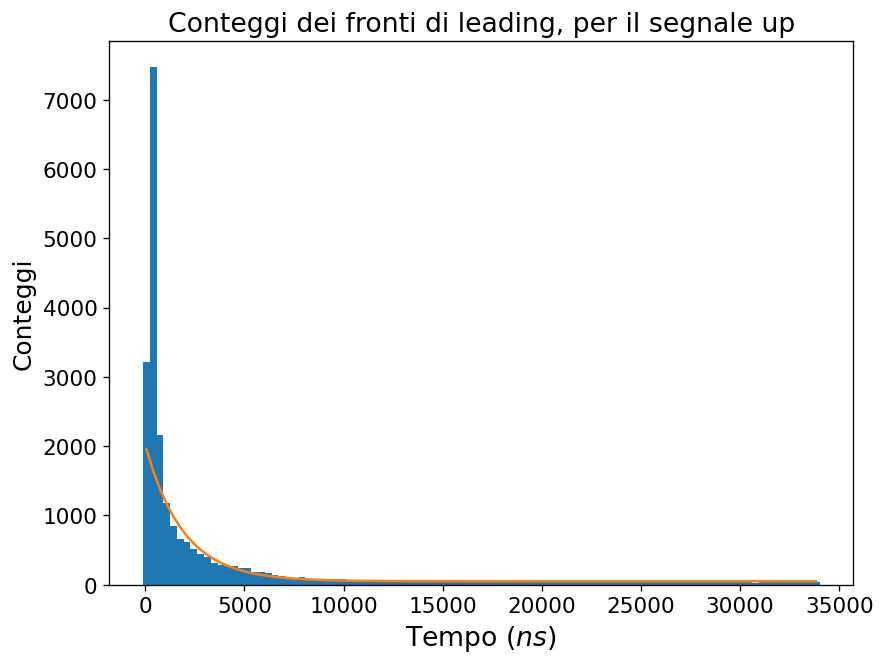

In [40]:
plt.figure(figsize=(8,6), dpi = 120)
#plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
up_0 = frontselect(dict_tot[0],0)
up0_t = [i[3] for i in up_0]
plt.title("Conteggi dei fronti di leading, per il segnale up", fontsize = 16)
yup0,xup0, oup0 = plt.hist(up0_t, bins =100)
xup0_adapt = fromhist(xup0)
valup, covup = curve_fit(exp, xup0_adapt[2:],yup0[2:], (5000,3000,100),[np.sqrt(i) for i in yup0[2:]])
plt.plot(xup0_adapt, [exp(i, valup[0], valup[1], valup[2]) for i in xup0_adapt])


In [41]:
sum (yup0)

24234.0

[1]
750.0108000000001


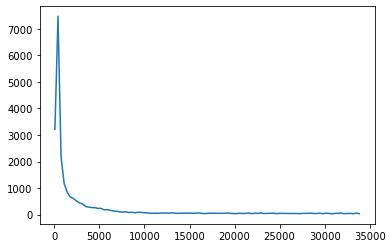

In [42]:
plt.plot(xup0_adapt, yup0)
m = max(yup0)
print(np.where(yup0 == m)[0])
print(xup0_adapt[2])

In [43]:
lim = 10000
yup0_sel =[]
for i in up0_t:
    if i<lim:
        yup0_sel.append(i)

Text(0.5, 1.0, 'Conteggi del fronte leading, per il segnale up (<10000 ns)')

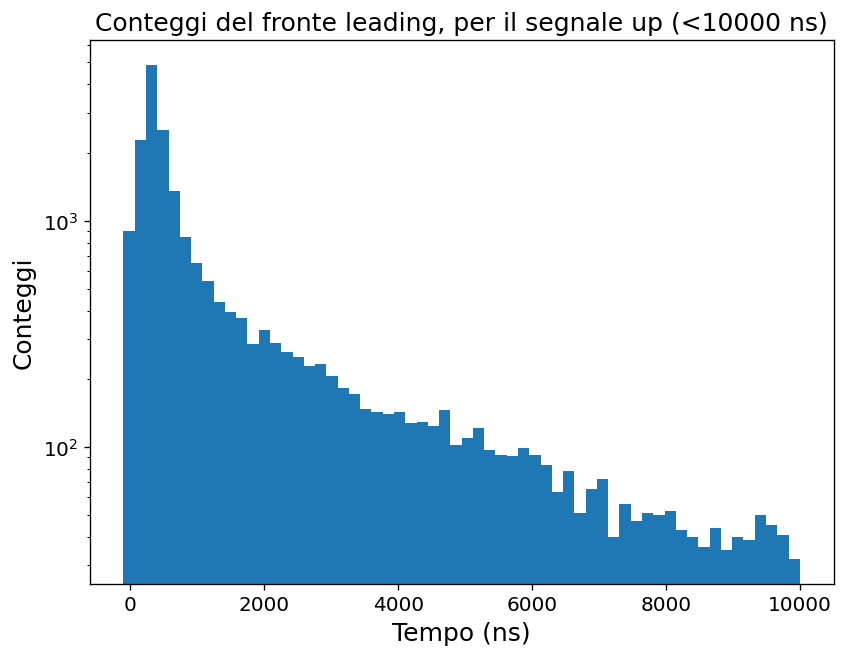

In [44]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yscale("log")
plt.yticks(fontsize = 12)
yselup0, xselup0, qqqqq = plt.hist(yup0_sel, bins = 60)
plt.title("Conteggi del fronte leading, per il segnale up (<"+str(lim)+" ns)", fontsize = 15)


In [45]:
sum(yselup0)/sum(yup0)

0.8536766526367913

trailing


In [46]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

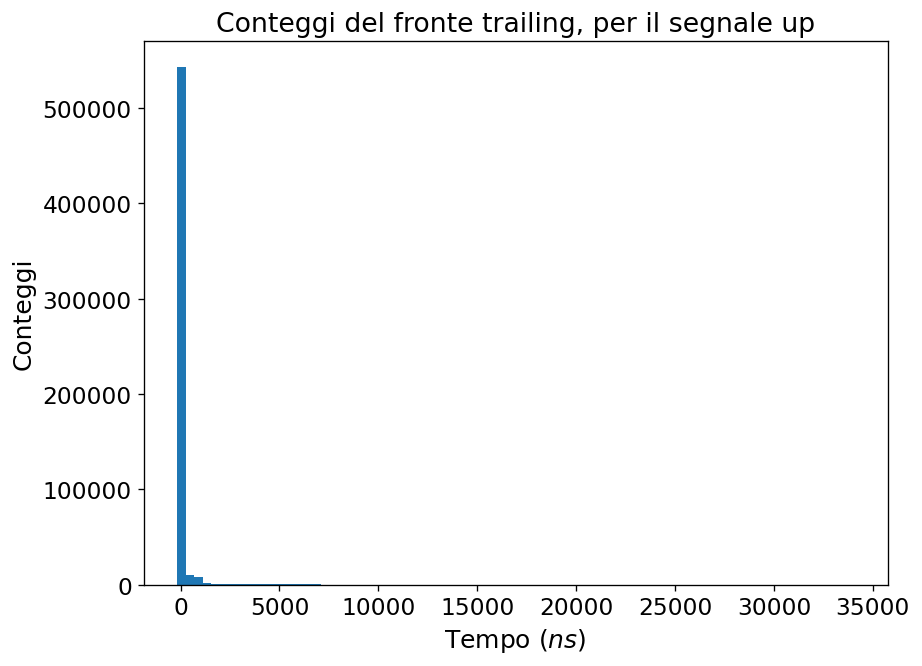

In [47]:
plt.figure(figsize=(8,6), dpi = 120)
#plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
up_1 = frontselect(dict_tot[0],1)
up1_t = [i[3] for i in up_1]
plt.title("Conteggi del fronte trailing, per il segnale up", fontsize = 16)
yup1,xup1, oup1 = plt.hist(up1_t, bins =80)



In [48]:
lim = 600
yup1_sel =[]
for i in up1_t:
    if i<lim:
        yup1_sel.append(i)

Text(0.5, 1.0, 'Conteggi del fronte trailing, per il segnale up (<600 ms)')

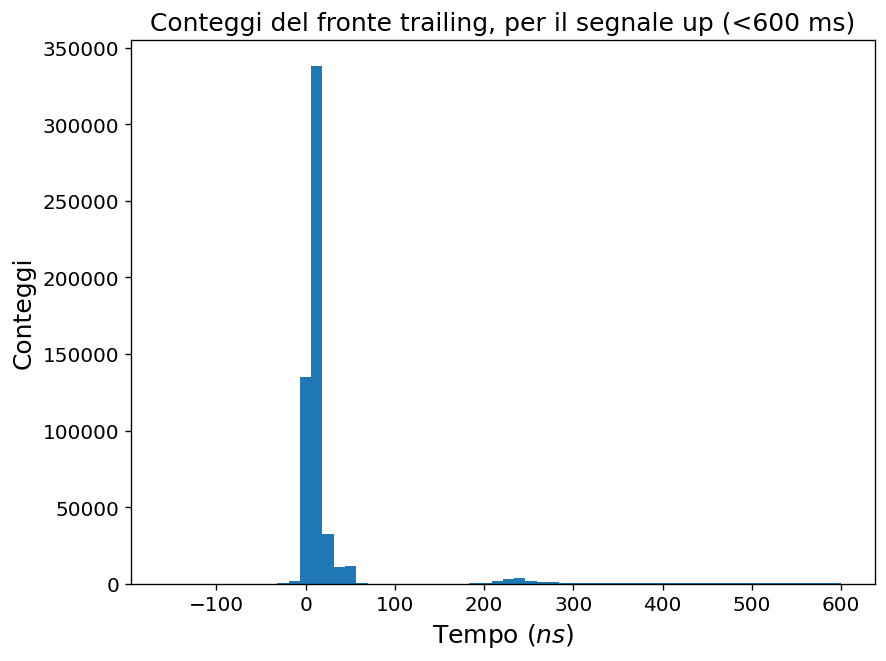

In [49]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup1, xselup1, qqqqq1 = plt.hist(yup1_sel, bins = 60)
plt.title("Conteggi del fronte trailing, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)


In [50]:
sum(yselup1)/sum(yup1)

0.9624739765867744

## Analisi CSI


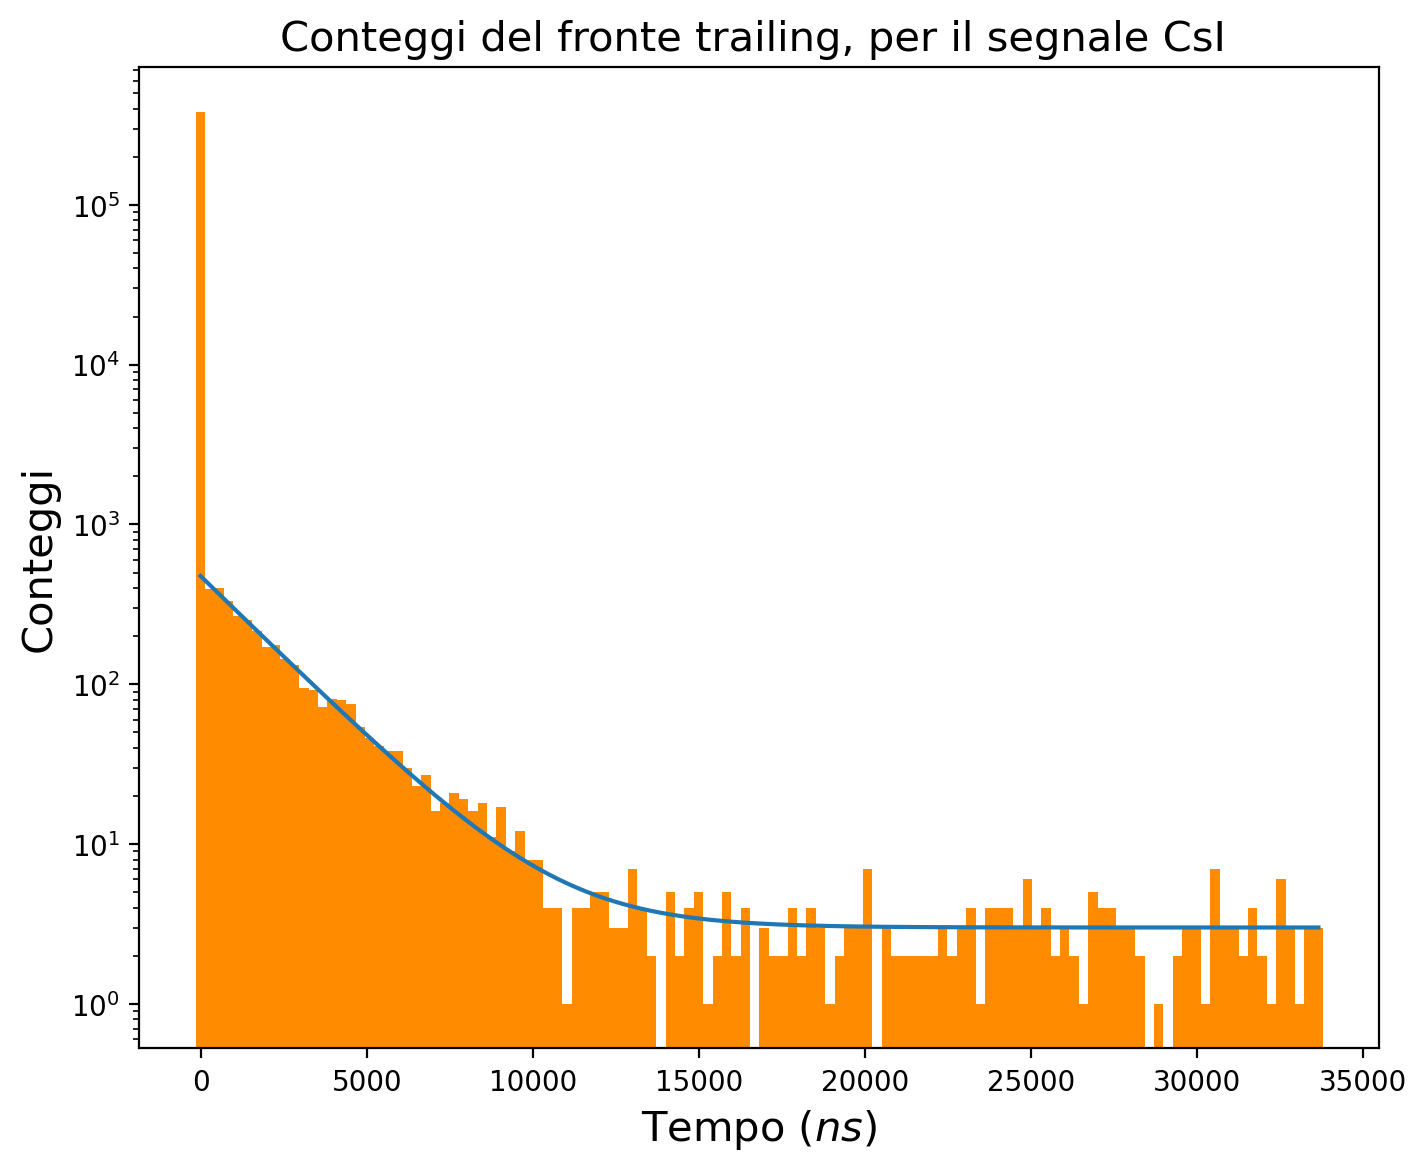

In [51]:
plt.figure(figsize=(8,6.5), dpi = 200)
csi = frontselect([i for i in dict_tot[3]],1)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.yscale("log")
ycsi,xcsi, ocsi = plt.hist([i[3] for i in csi], bins =120, color = "darkorange")
plt.title("Conteggi del fronte trailing, per il segnale CsI ", fontsize = 15)
p_csi, s_csi = curve_fit(exp, fromhist(xcsi)[1:], ycsi[1:], (30000,2000,10))
plt.plot(fromhist(xcsi), [exp(i, *p_csi) for i in fromhist(xcsi) ])

In [52]:
sum(ycsi)

387227.0

Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


12.55612105230283

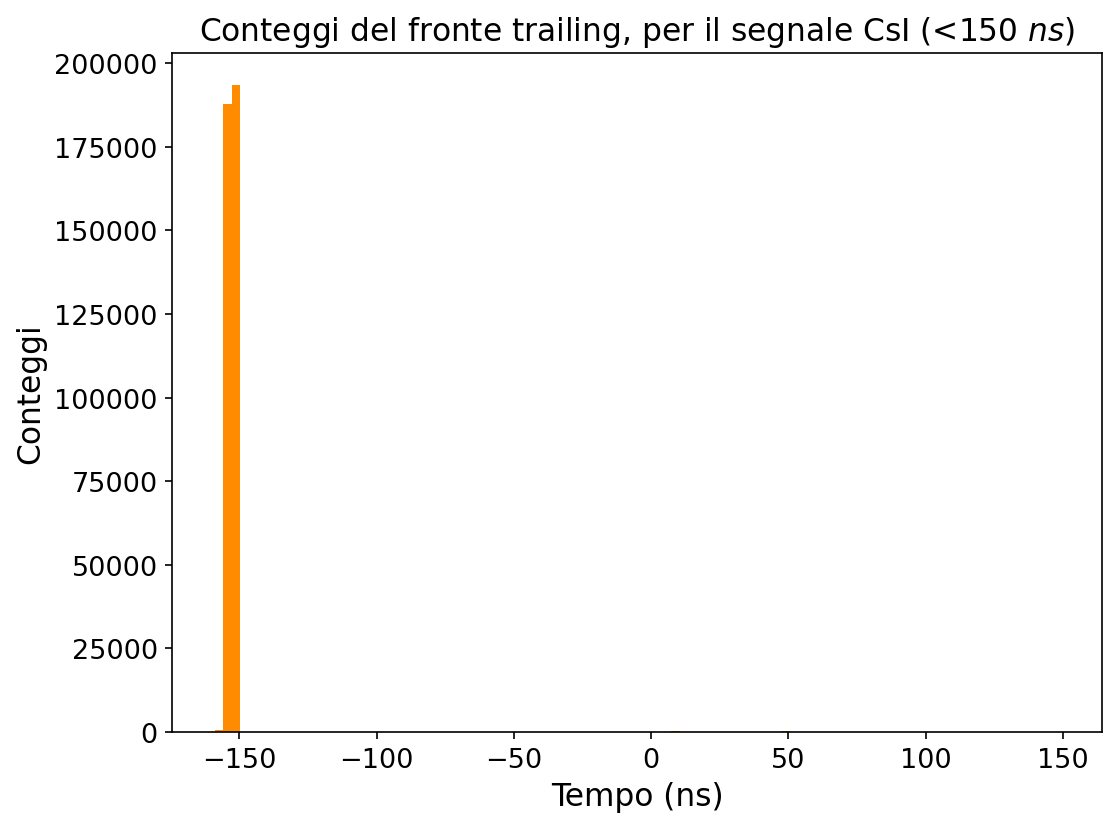

In [53]:
csi_selected = []
lim = 150
for i in csi:
    if i[3]<lim:
        csi_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
csisy, csix, otcsh= plt.hist(csi_selected, color = "darkorange", bins = 100)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale CsI (<"+str(lim)+" $ns$)", fontsize = 15)

np.std(csi_selected)

In [54]:
sum(csisy)/sum(ycsi)

0.9905765868599039

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

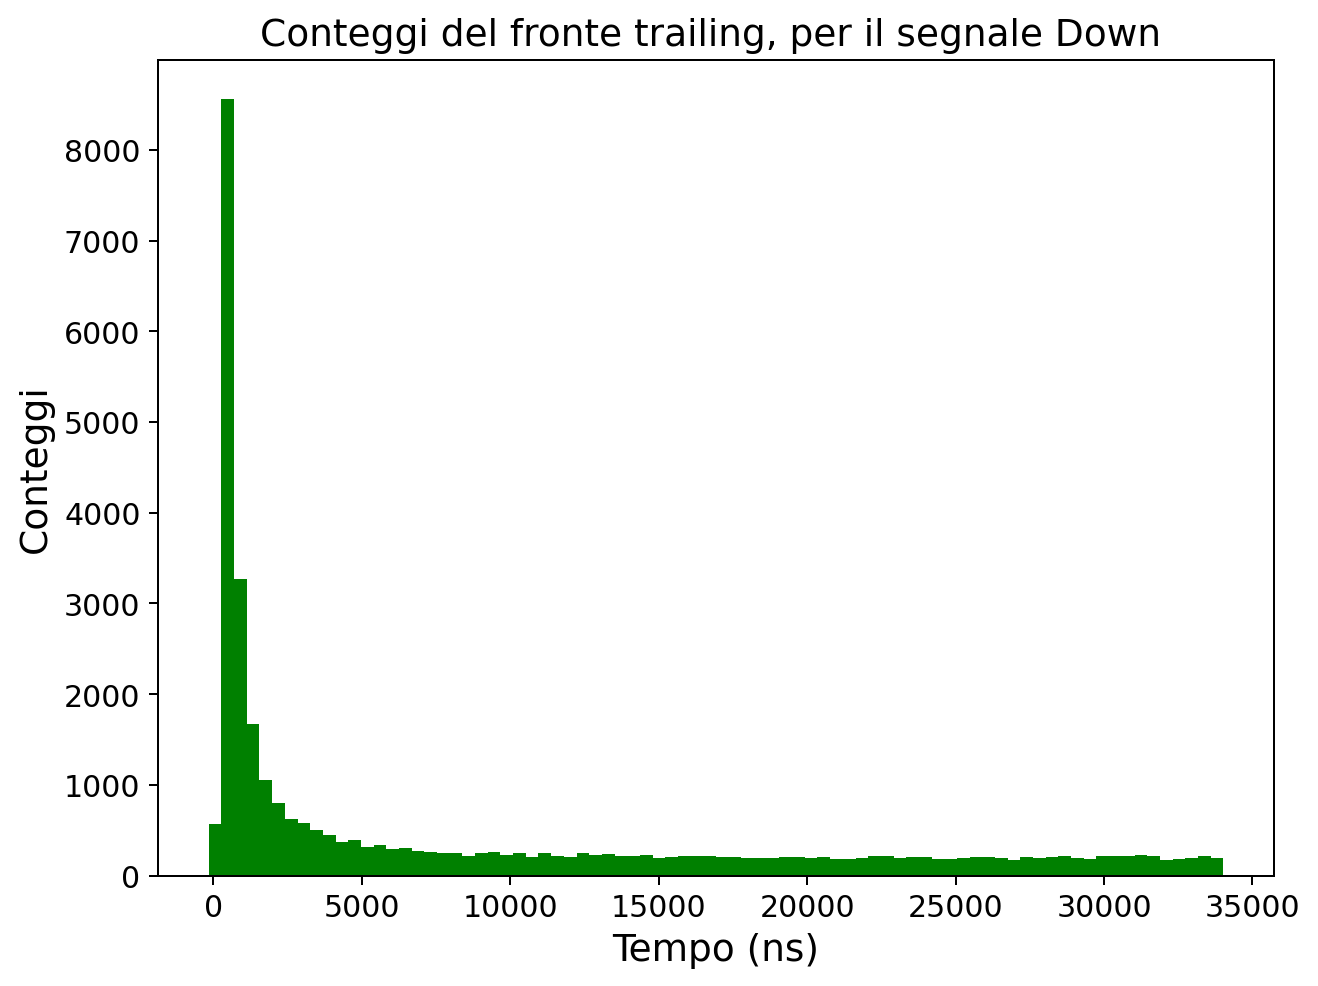

In [55]:
plt.figure(figsize=(8,6), dpi = 180)
downs= frontselect([i for i in dict_tot[4]],1)

ydw,xdw, odw = plt.hist([i[3] for i in downs], bins =80, color = "green")
plt.title("Conteggi del fronte trailing, per il segnale Down ", fontsize = 15)

#plt.yscale("log")
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
p_dw, s_dw = curve_fit(exp, fromhist(xdw)[1:], ydw[1:], (30000,2000,10), [np.sqrt(i) for i in ydw[1:] ])
#plt.plot(fromhist(xdw), [exp(i, *p_dw) for i in fromhist(xdw) ], color= "red")
plt.show()

In [56]:
p_dw

array([17311.83951272,   581.18021397,   219.72615662])

Text(0.5, 1.0, 'Conteggi del fronte leading, per il segnale Down (<10000 $ns$)')

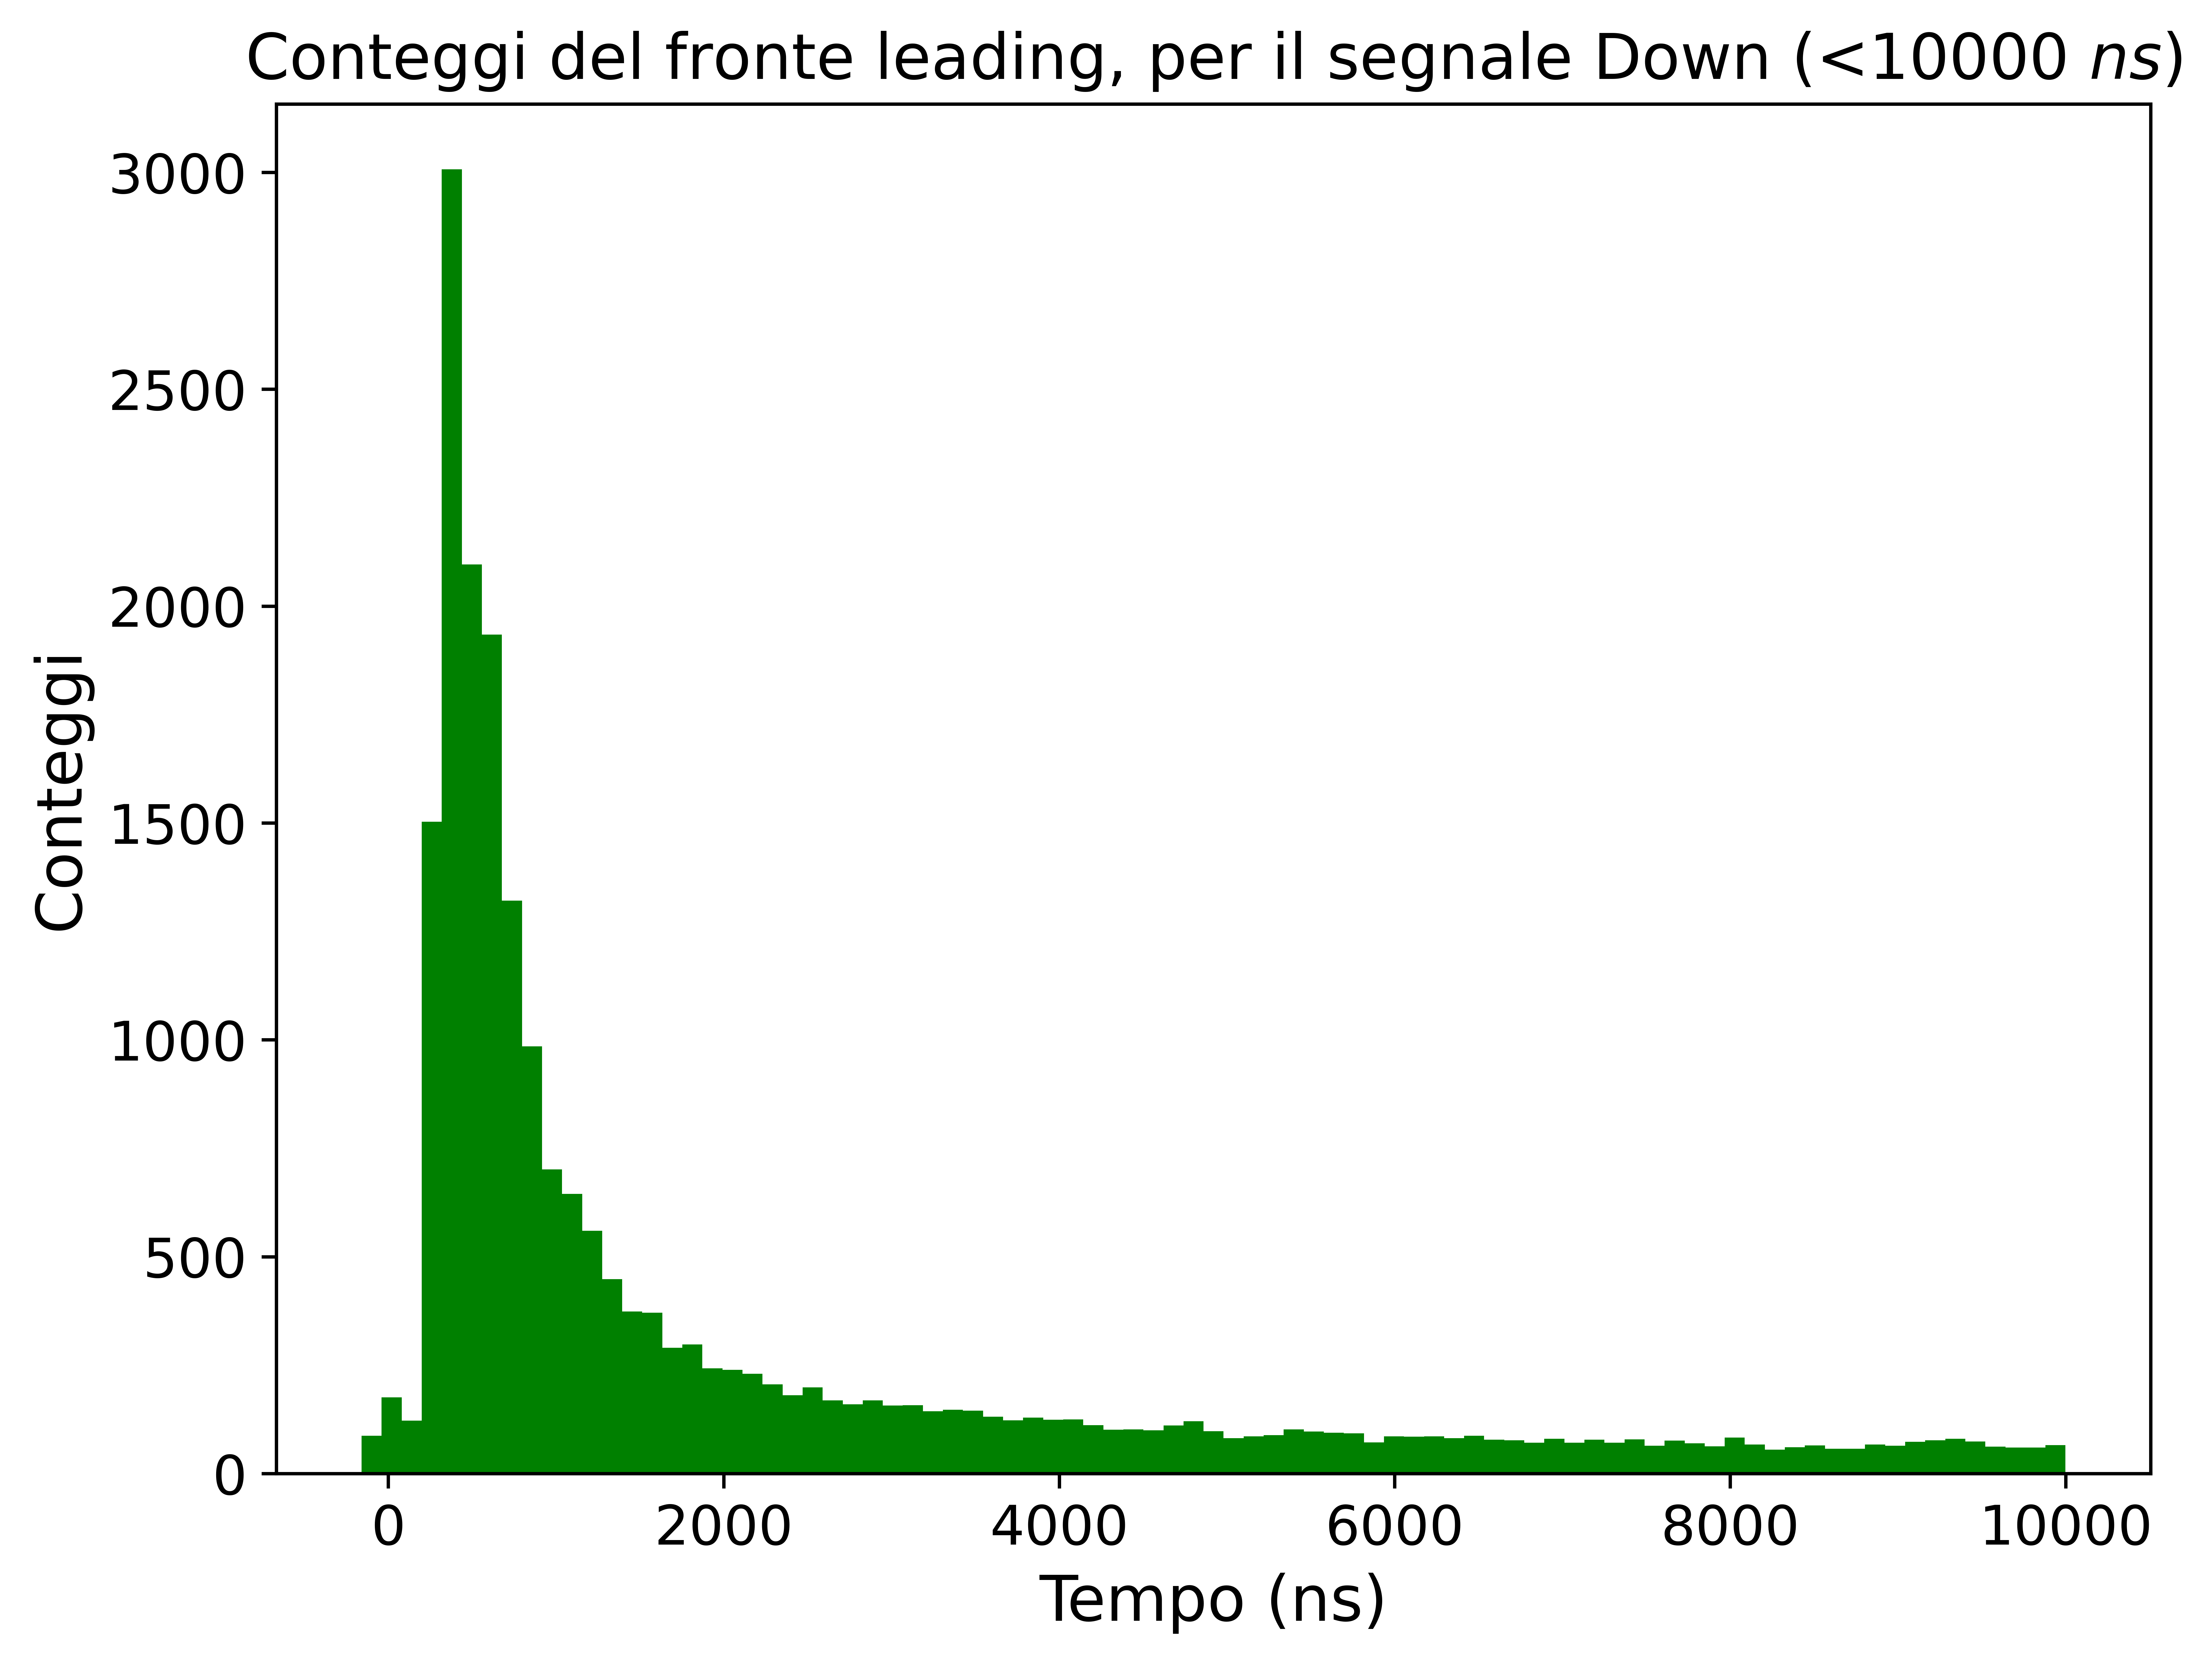

In [57]:
dw_selected = []
lim = 10000
for i in downs:
    if i[3]<lim:
        dw_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 1000)
dwsy, dwsx, otcsh= plt.hist(dw_selected, color = "green", bins = 85)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte leading, per il segnale Down (<"+str(lim)+" $ns$)", fontsize = 15)


In [58]:
sum(dwsy)/sum(ydw)

0.656113862863281

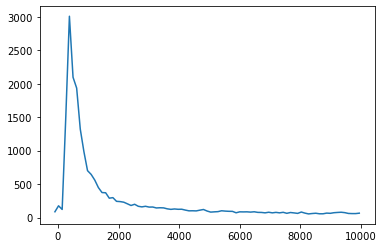

In [59]:
plt.plot(fromhist(dwsx),dwsy)

In [60]:
sum(dwsy)/sum(ydw)

0.656113862863281

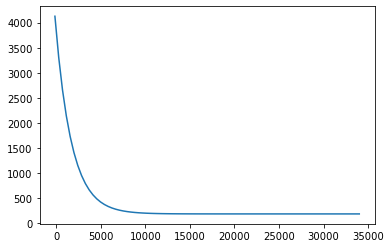

In [61]:
##### ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

In [62]:
paramsd

array([3615.99553224, 1825.82322412,  182.55172314])


## Analisi delle coincidenze


In [66]:
coinc_110 = frontselect(dict_tot[6],0)

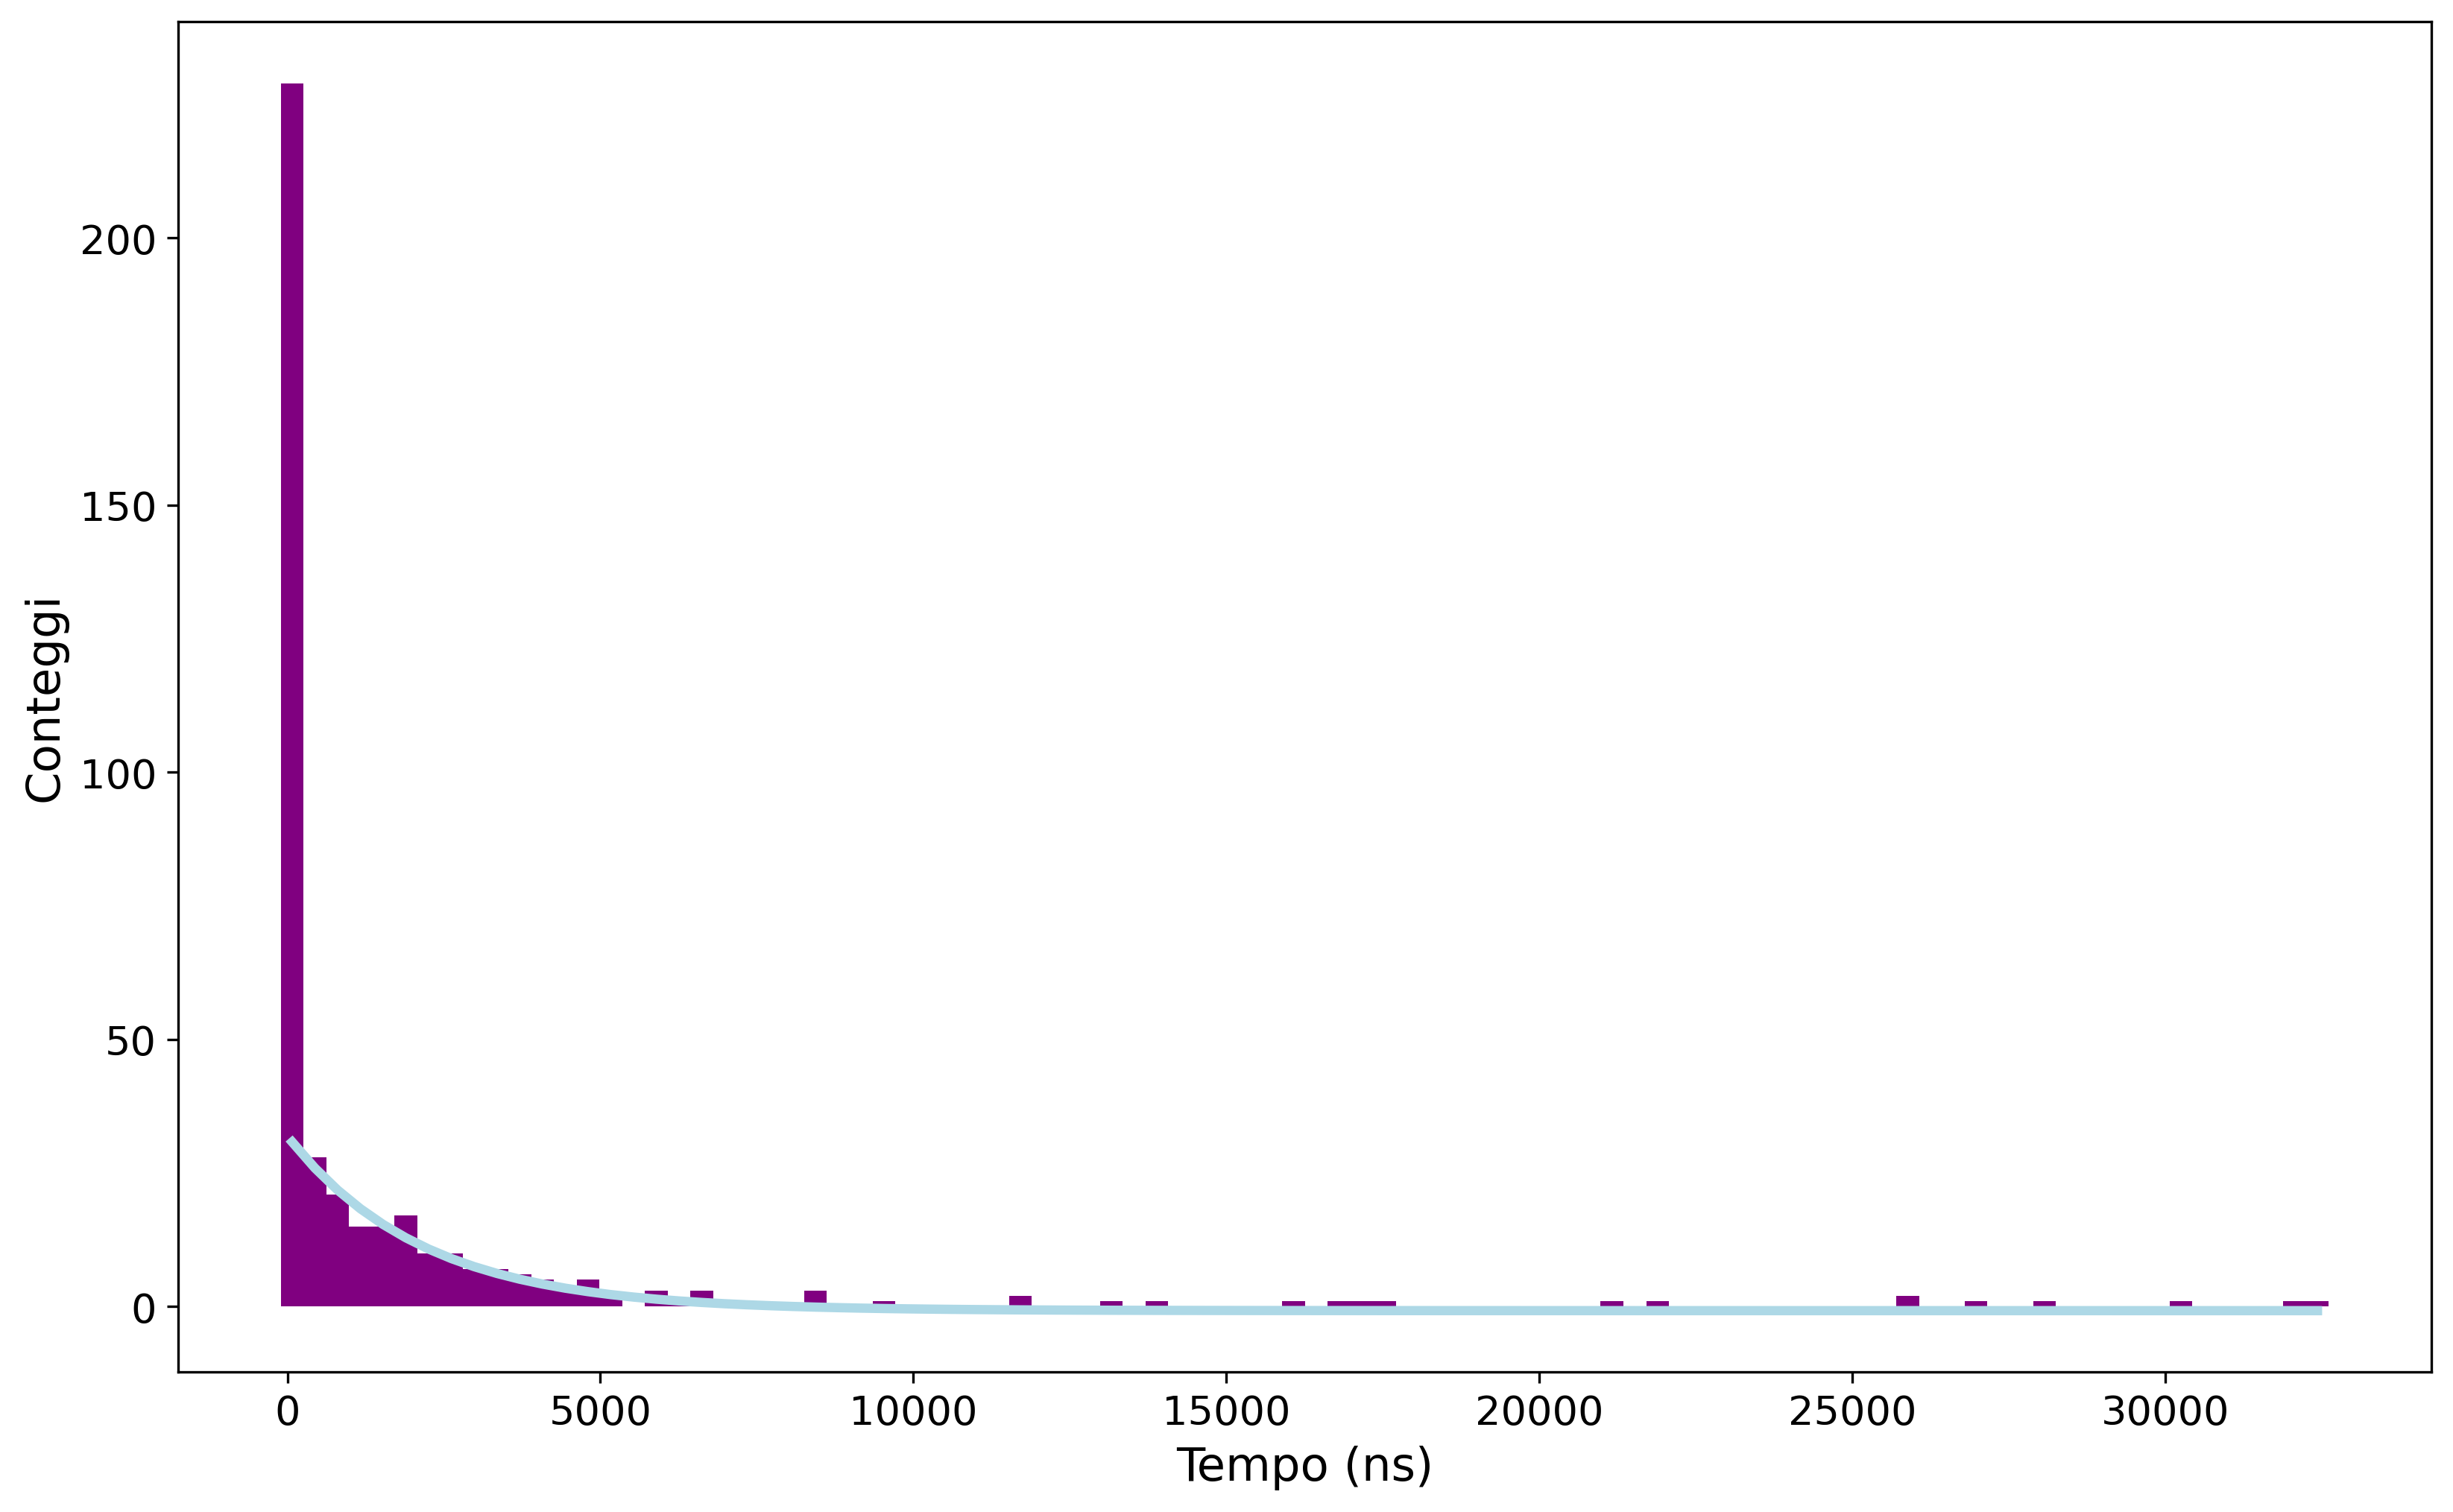

In [94]:
plt.figure(figsize=(13,8), dpi = 300)

y6,x6, o6 = plt.hist([i[3] for i in coinc_110], bins =90, color = "purple")
#plt.yscale("log")
N6 = sum(y6)
errs = []
for i in y6:
    if i !=0:
        errs.append(np.sqrt((i)))
    else:
        errs.append(1)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
params6, cov6= curve_fit(f = exp,xdata = fromhist(x6)[1:22],ydata = y6[1:22], p0 = (70,2000,10), sigma = errs[1:22])
plt.plot(fromhist(x6), [exp(i, *params6) for i in fromhist(x6) ], color = "lightblue", linewidth=3)



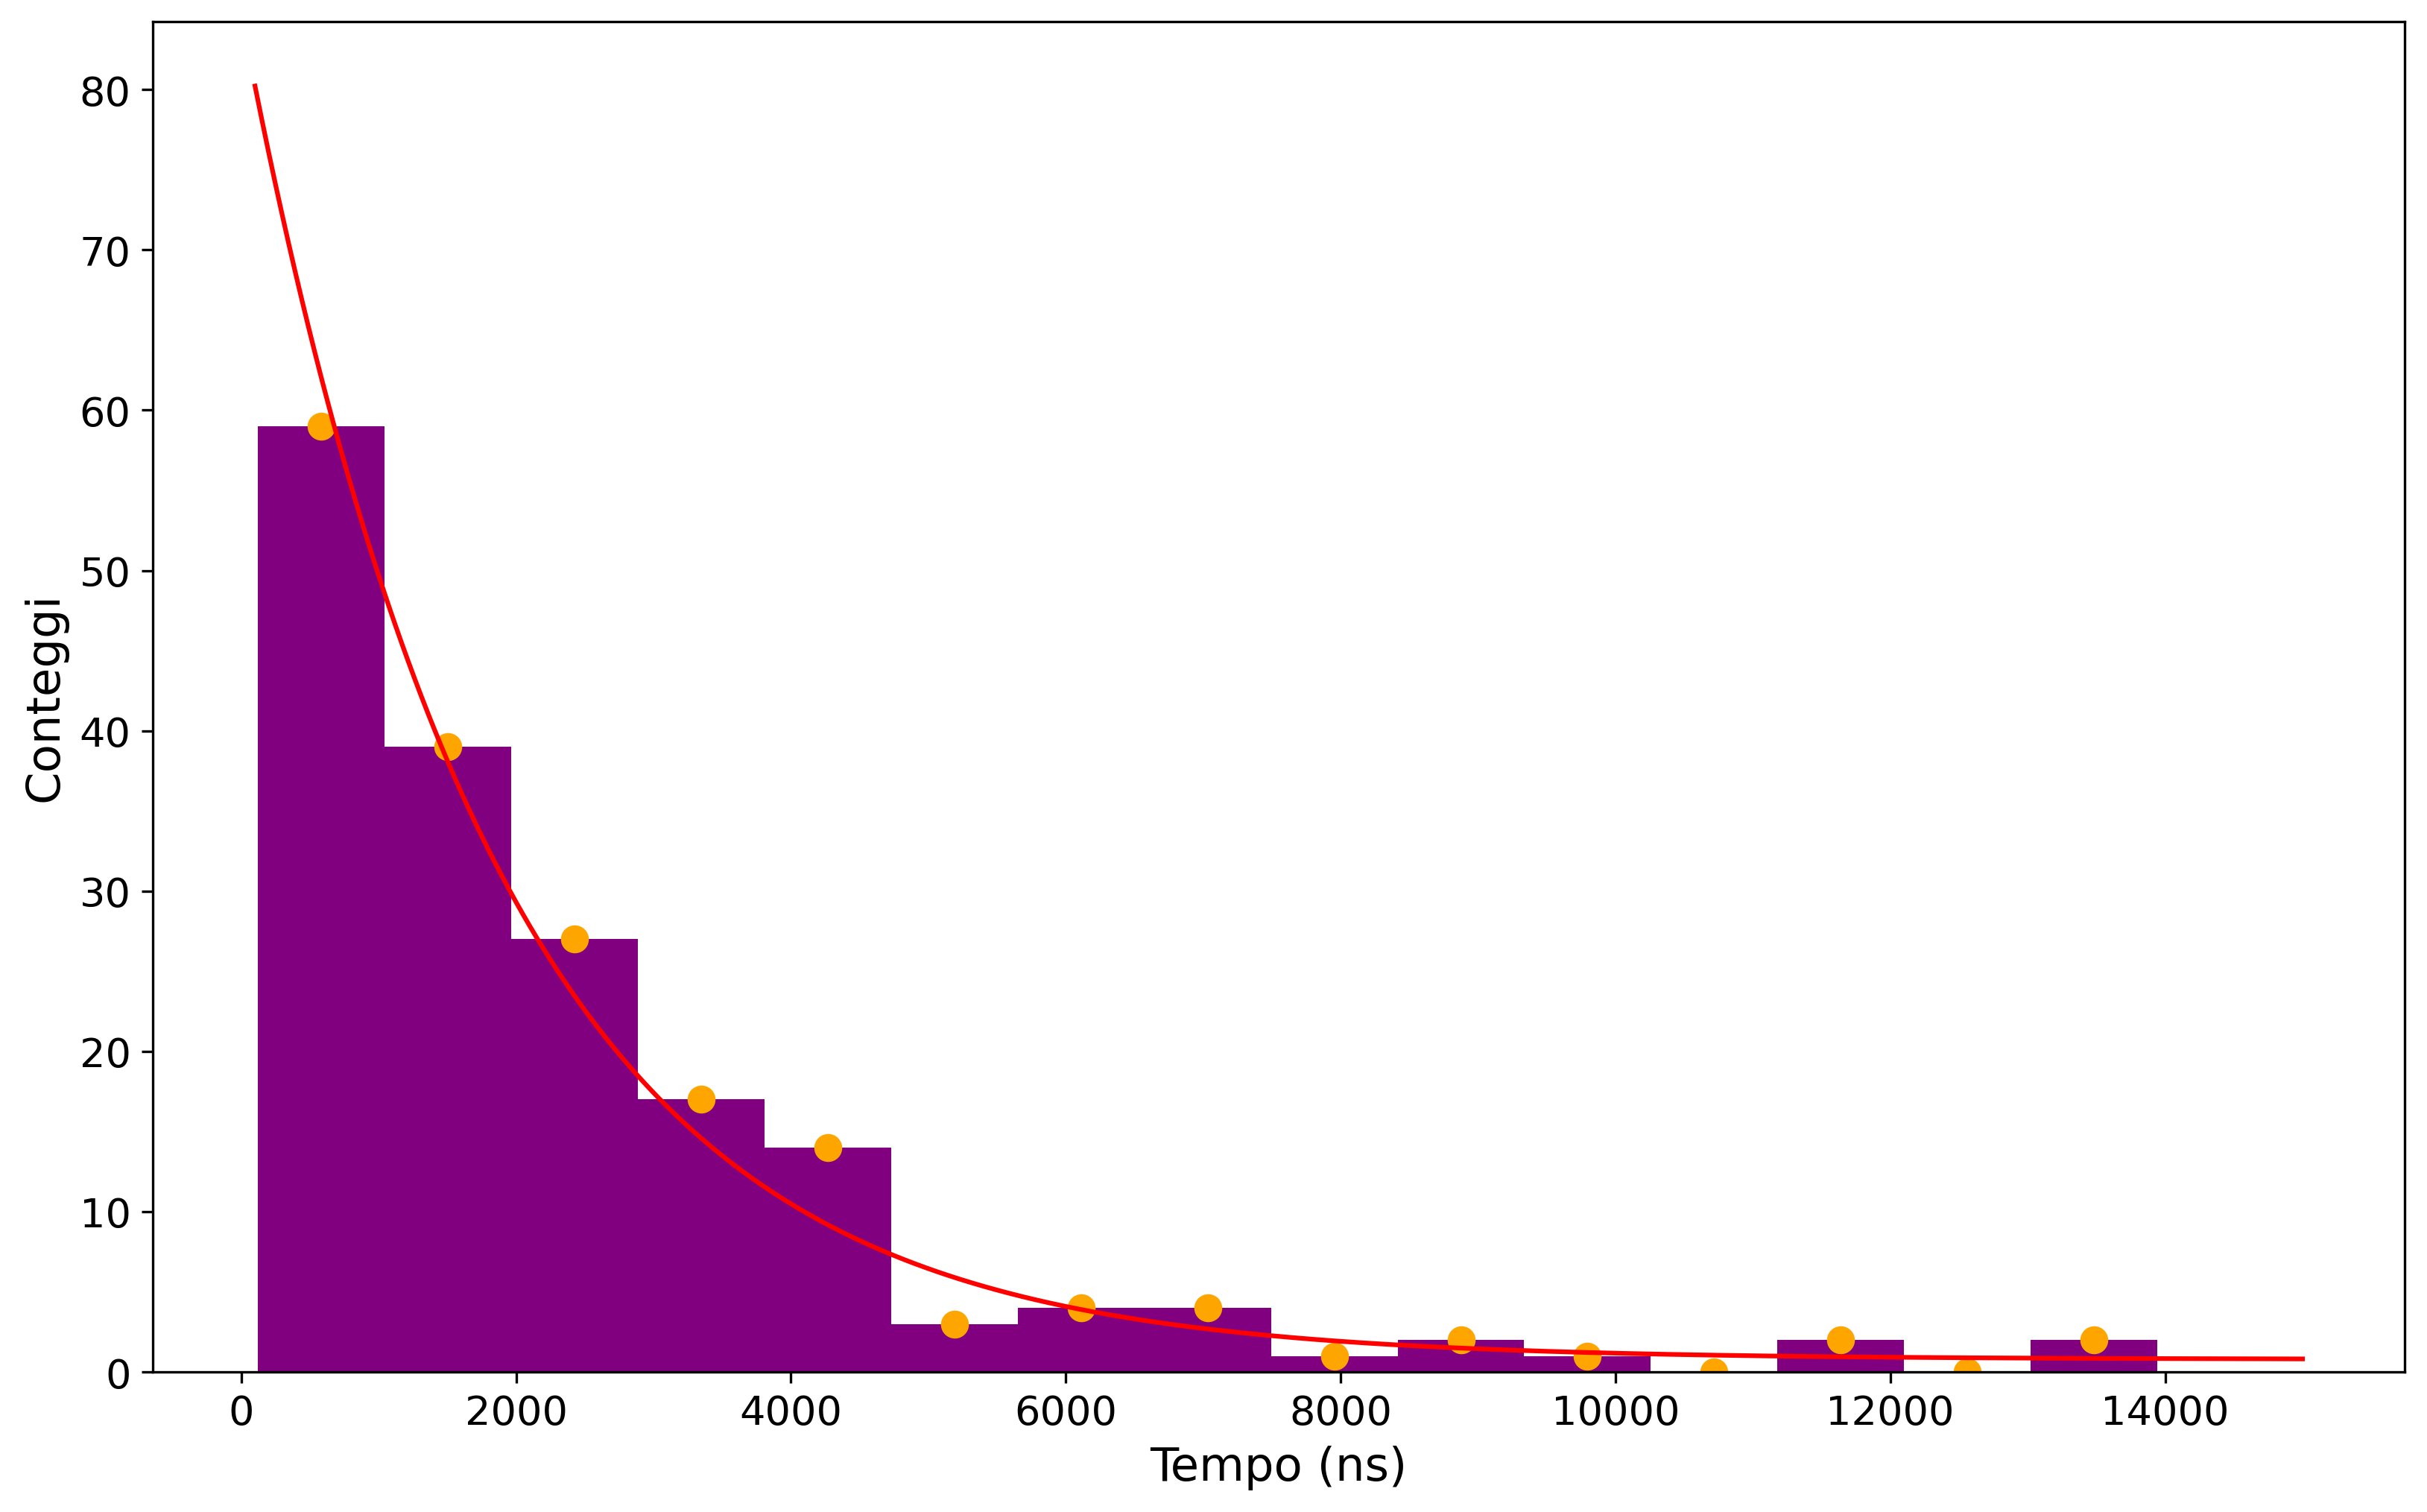

In [93]:
plt.figure(figsize=(13,8), dpi = 300)
sel_6 =[]
for i in coinc_110:
    if i[3]>100 and i[3]<15000:
        sel_6.append(i[3])

y6,x6, o6 = plt.hist(sel_6, bins =15, color = "purple")
#plt.yscale("log")
N6 = sum(y6)
errs = []
for i in y6:
    if i !=0:
        errs.append(np.sqrt((i*(1-i/N6))))
    else:
        errs.append(3)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
params6, cov6= curve_fit(f = exp,xdata = fromhist(x6),ydata = y6, p0 = (70,2000,10), sigma = errs)
xmodel= np.linspace(100,15000,4000)
plt.scatter(fromhist(x6), y6, color= "orange", linewidth=3)
plt.plot(xmodel, [exp(i, *params6) for i in xmodel ], color= "red")



In [69]:
cov6

array([[ 6.26127378e+01, -1.03697879e+03,  1.28495832e+00],
       [-1.03697879e+03,  3.26461916e+04, -6.44519283e+01],
       [ 1.28495832e+00, -6.44519283e+01,  2.98061704e-01]])

In [70]:
cov6

array([[ 6.26127378e+01, -1.03697879e+03,  1.28495832e+00],
       [-1.03697879e+03,  3.26461916e+04, -6.44519283e+01],
       [ 1.28495832e+00, -6.44519283e+01,  2.98061704e-01]])

In [71]:
params6_c, cov6_c = curve_fit(f = exp,xdata = fromhist(x6)[1:11],ydata =[i-0.837 for i in  y6[1:11]], p0 = (70,2000,0), sigma = [np.sqrt(i-0.837) for i in  y6[1:11]])

In [72]:
params6_c

array([ 1.03917693e+02,  1.65602638e+03, -2.92548700e-01])

Possiamo fare un fit sulle coincidenze per ottenere la vita media del muone. Per eliminare le casuali dalle coincidenze, possiamo sottrarre, ai dati il coefficiente costante ottenuto dal fit. 
Quindi 

In [73]:
params6

array([8.38307825e+01, 1.85473760e+03, 7.93184314e-01])

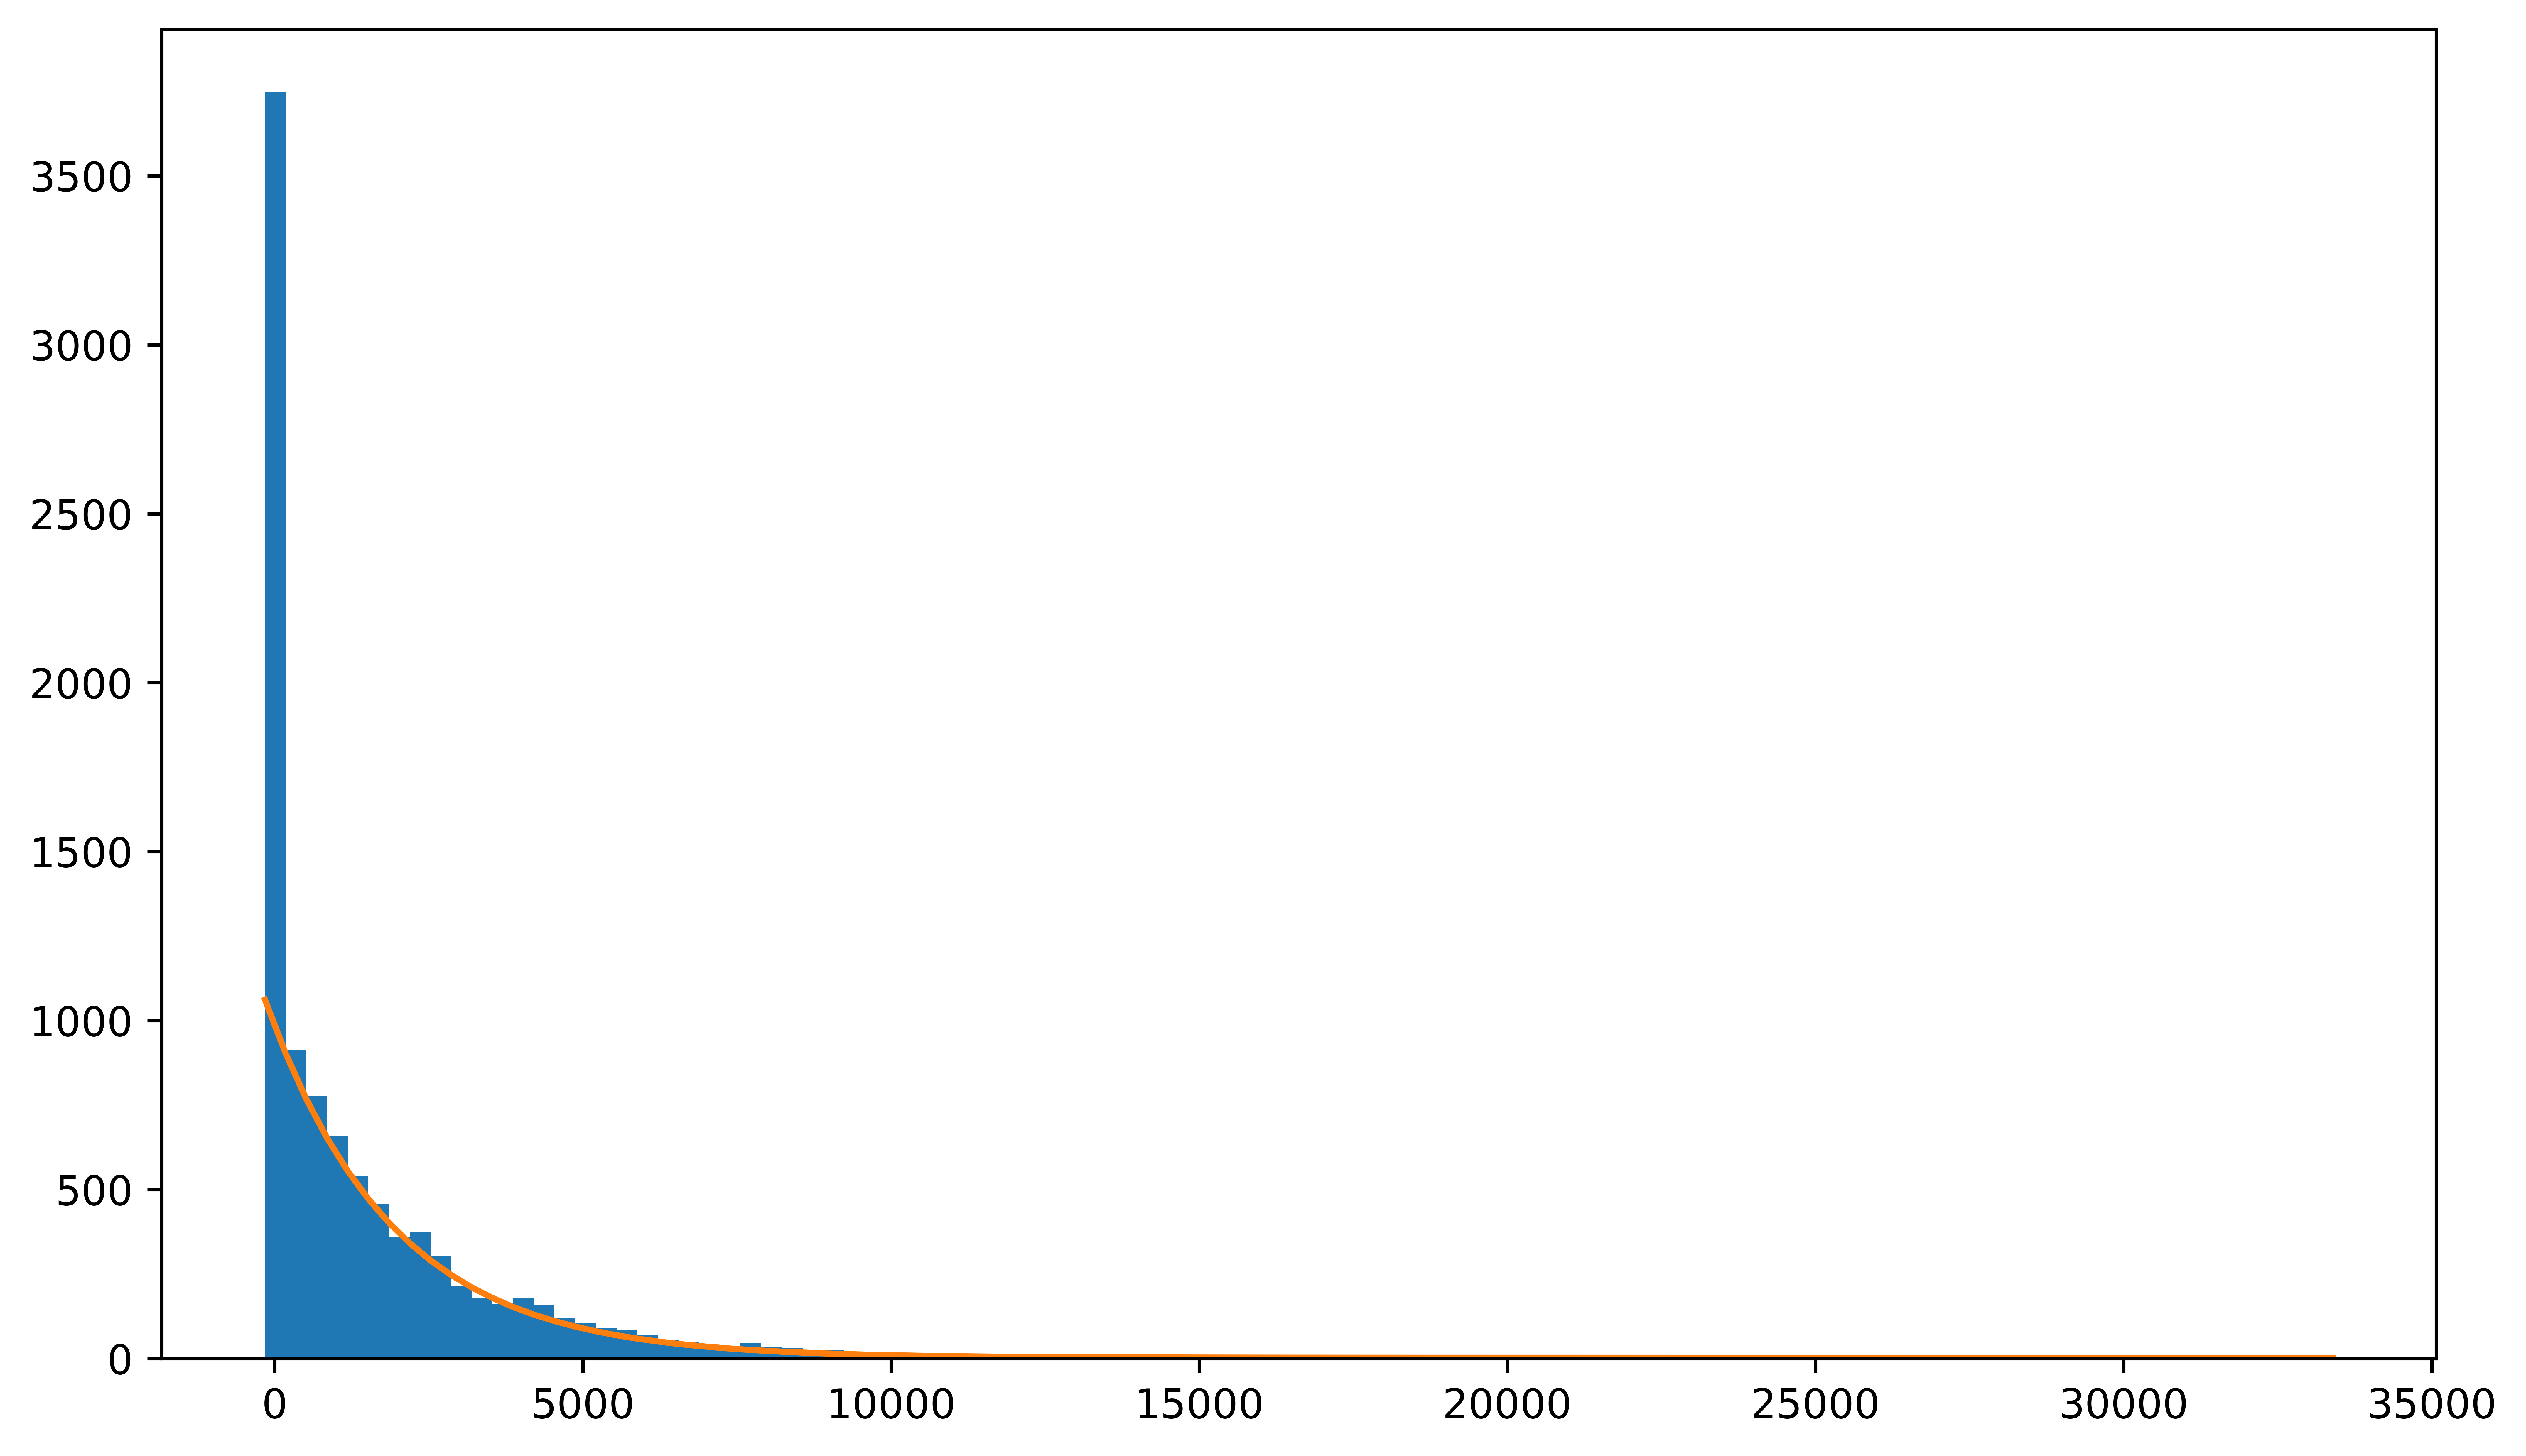

In [74]:
plt.figure(figsize=(10,6), dpi = 1000)
ys, xs , other= plt.hist([i[3] for i in dict_tot[8]], bins = 100)
params, cov = curve_fit(f = exp,xdata = xs[1:(len(xs)-1)],ydata = ys[1:], p0 = (70,2000,0))

model = [exp(i, *params) for i in xs]
plt.plot(xs,model)

In [75]:
params

array([ 981.33881478, 2063.0136849 ,    2.11986855])

In [76]:
params, cov = curve_fit(f = exp,xdata = fromhist(xs)[1:],ydata = [i-2 for i in ys[1:]], p0 = (70,2000,0))


In [77]:
params

array([1.06446801e+03, 2.06301529e+03, 1.19835037e-01])

### 01X


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

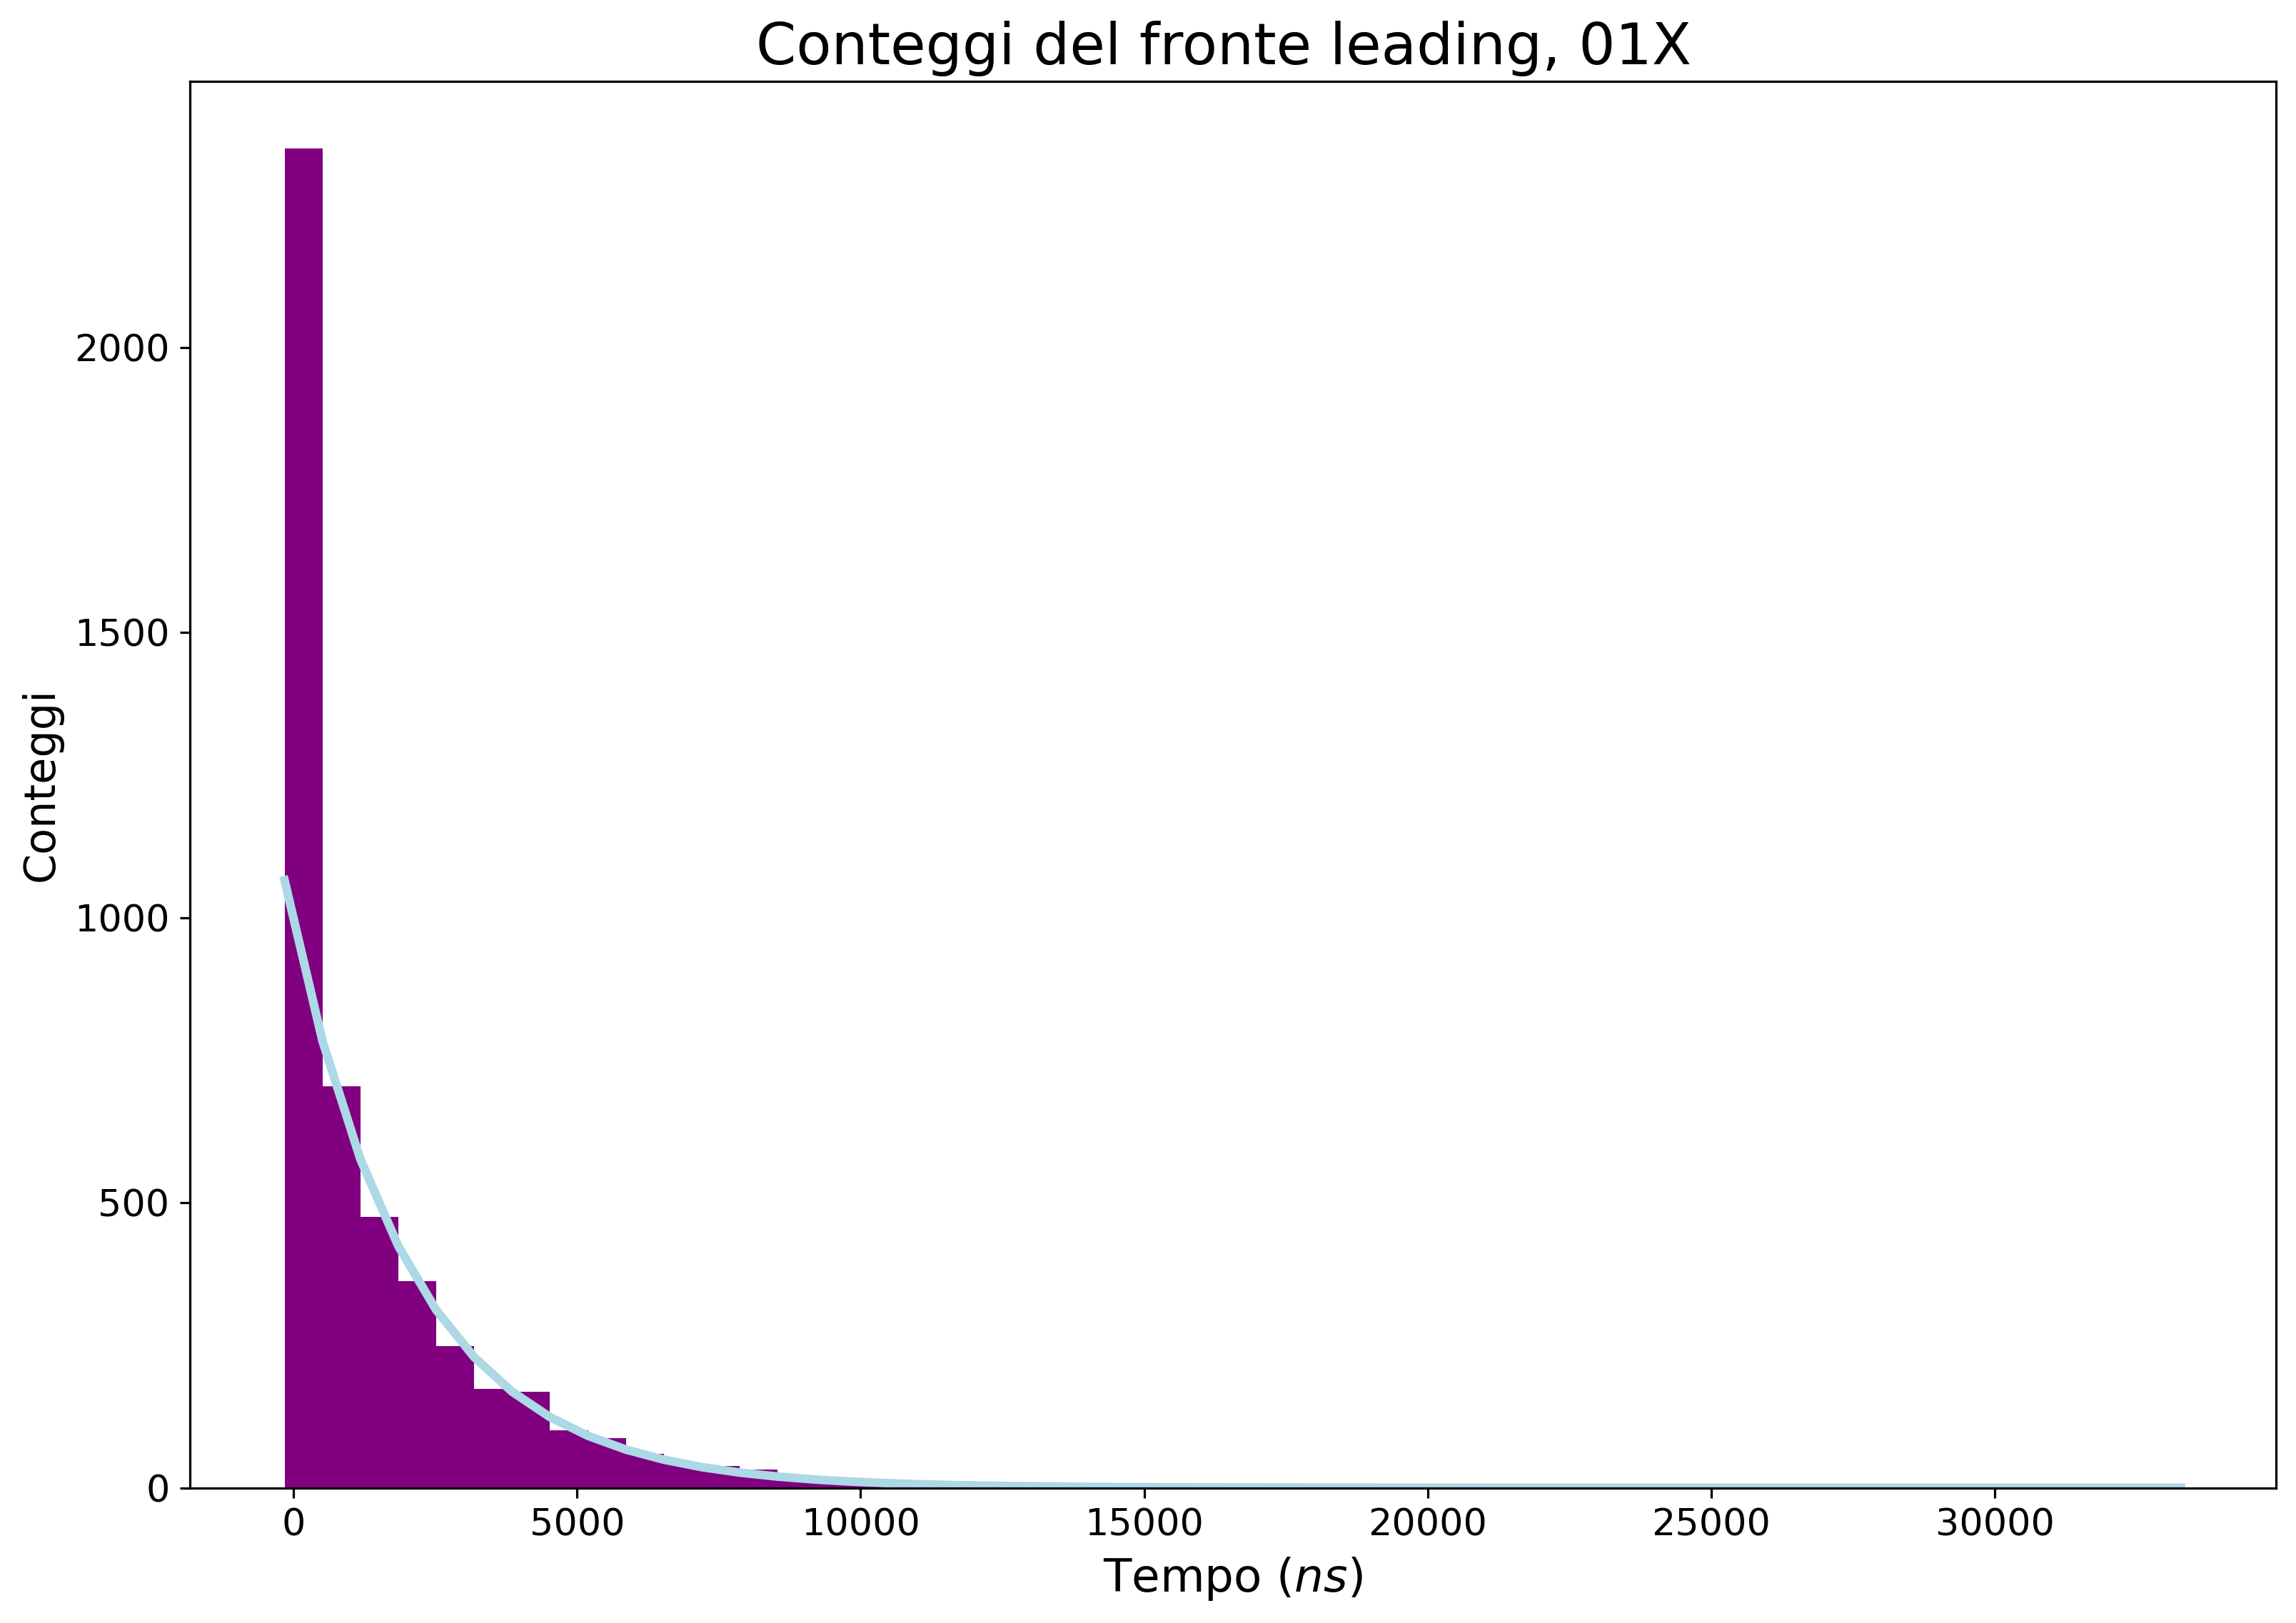

In [91]:
canale_8 =[]
for i in frontselect(dict_tot[8],0):
        canale_8.append(i[3])
plt.figure(figsize=(13,9), dpi = 290)
plt.title("Conteggi del fronte leading, 01X ", fontsize = 20)

ys, xs , other= plt.hist(canale_8, bins = 50, color = "purple")
N8 = sum(ys)
errs = []
for i in ys:
    if i !=0:
        errs.append(np.sqrt(1+(i)*(1-i/N8)))
    else:
        errs.append(np.sqrt(1))
params, cov = curve_fit(f = exp,xdata = fromhist(xs)[1:],ydata = ys[1:], p0 = (70,2000,0), sigma = errs[1:])
model = [exp(i, *params) for i in xs]
plt.plot(xs,model, color = "lightblue", linewidth=3)
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
#plt.xlim(0,1000)

In [79]:
params

array([9.90667719e+02, 2.17534199e+03, 2.35871081e-01])

trailing

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

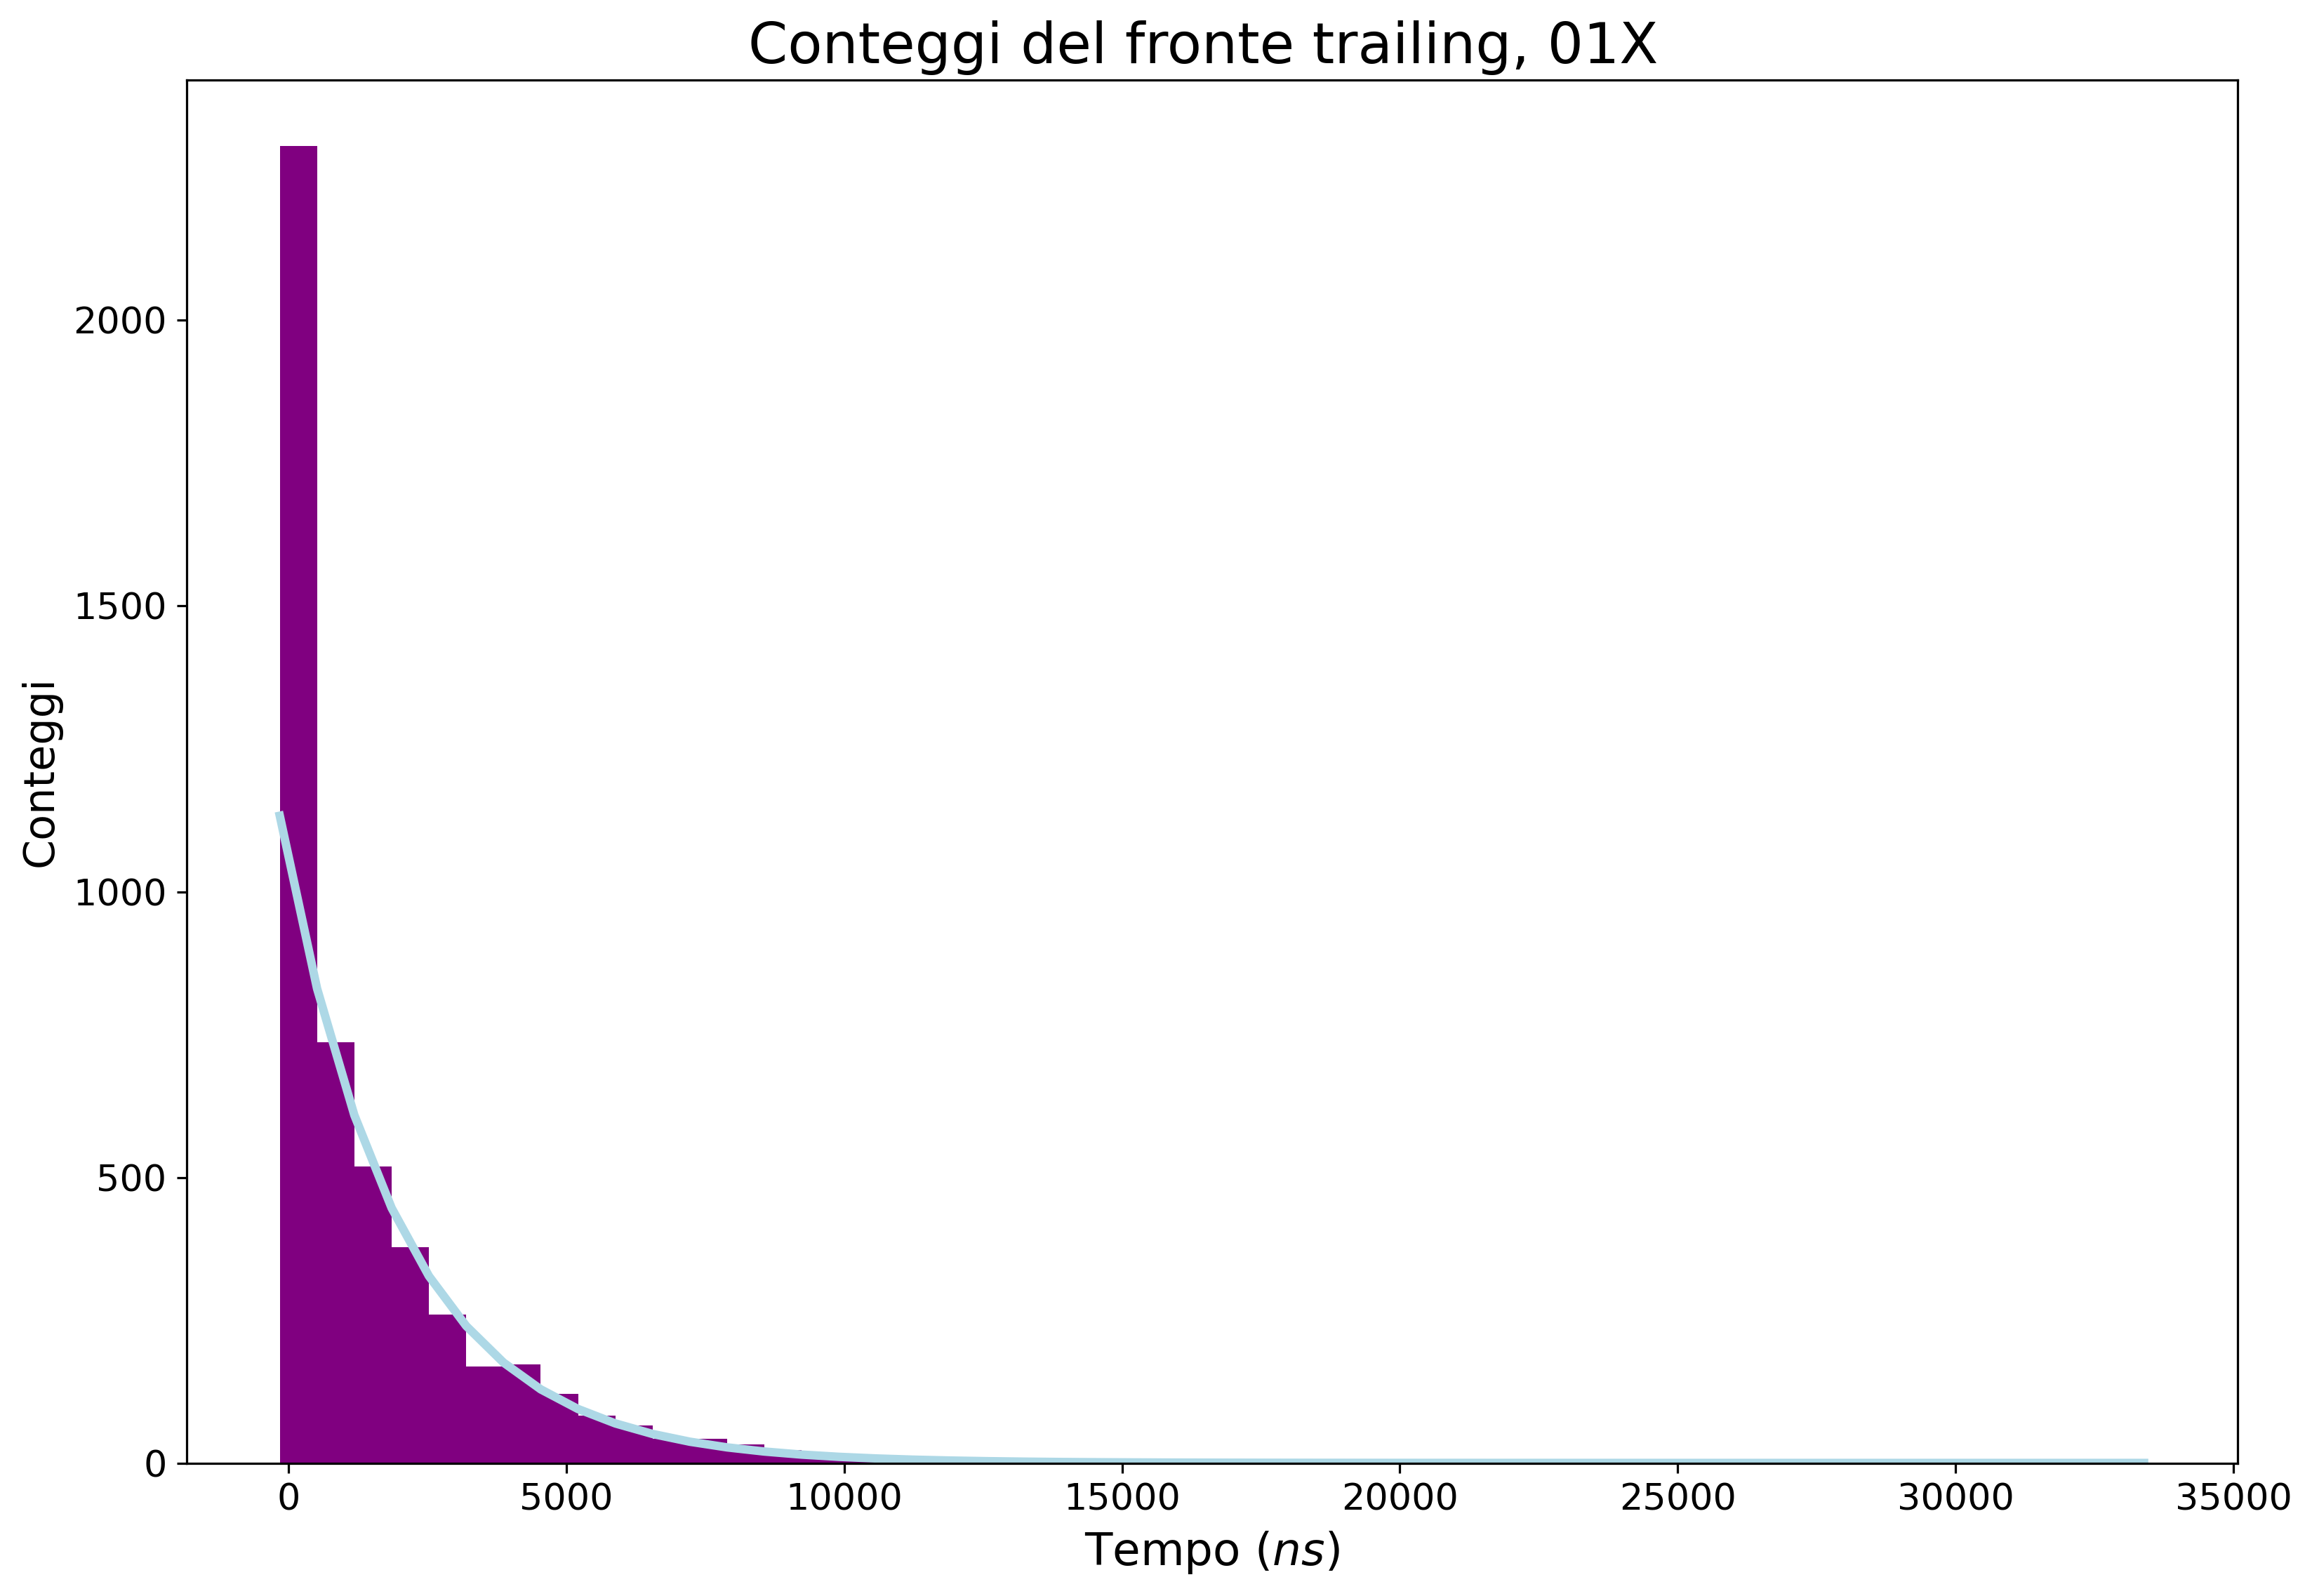

In [92]:
canale_8 =[]
for i in frontselect(dict_tot[8],1):
        canale_8.append(i[3])
plt.figure(figsize=(13,9), dpi = 290)
plt.title("Conteggi del fronte trailing, 01X ", fontsize = 20)

ys, xs , other= plt.hist(canale_8, bins = 50, color = "purple")
N8 = sum(ys)
errs = []
for i in ys:
    if i !=0:
        errs.append(np.sqrt(1+(i)*(1-i/N8)))
    else:
        errs.append(np.sqrt(1))
params, cov = curve_fit(f = exp,xdata = fromhist(xs)[1:],ydata = ys[1:], p0 = (70,2000,0), sigma = errs[1:])
model = [exp(i, *params) for i in xs]
plt.plot(xs,model, color = "lightblue", linewidth=3)
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
#plt.xlim(0,1000)

In [81]:
params

array([9.90667719e+02, 2.17534199e+03, 2.35871081e-01])

In [ ]:
plt.hist([i[3] for  i in coinc_011])

## More than one event


In [95]:
multiple_event ={} #up to two events
multiple_events = {} #more than two events
c= 0 
front_3_trailing = frontselect(dict_tot[3],1)
for i in range(len(front_3_trailing)-1):
    if front_3_trailing[i][0]  == front_3_trailing[i+1][0]:
        n = front_3_trailing[i][0]
        #print(c)
        if c ==0: 
            multiple_event[n] = [front_3_trailing[i]]
            multiple_event[n].append(front_3_trailing[i+1])
            #print(multiple_event[n])
            c+=1
        elif c ==1:
            memory = multiple_event[n]
            #print("memory = "+ str(memory))
            
            multiple_events[n] = memory
            multiple_events[n].append(front_3_trailing[i+1])
            del multiple_event[n]
            c+=1
        else:
            print(n)
            
            multiple_events[n].append(front_3_trailing[i+1])
    else:
        c=0
        
    
        
    

175076


In [96]:
delta_t_csi = []
for i in multiple_event.keys():
    delta_t_csi.append(multiple_event[i][1][3]-multiple_event[i][0][3])

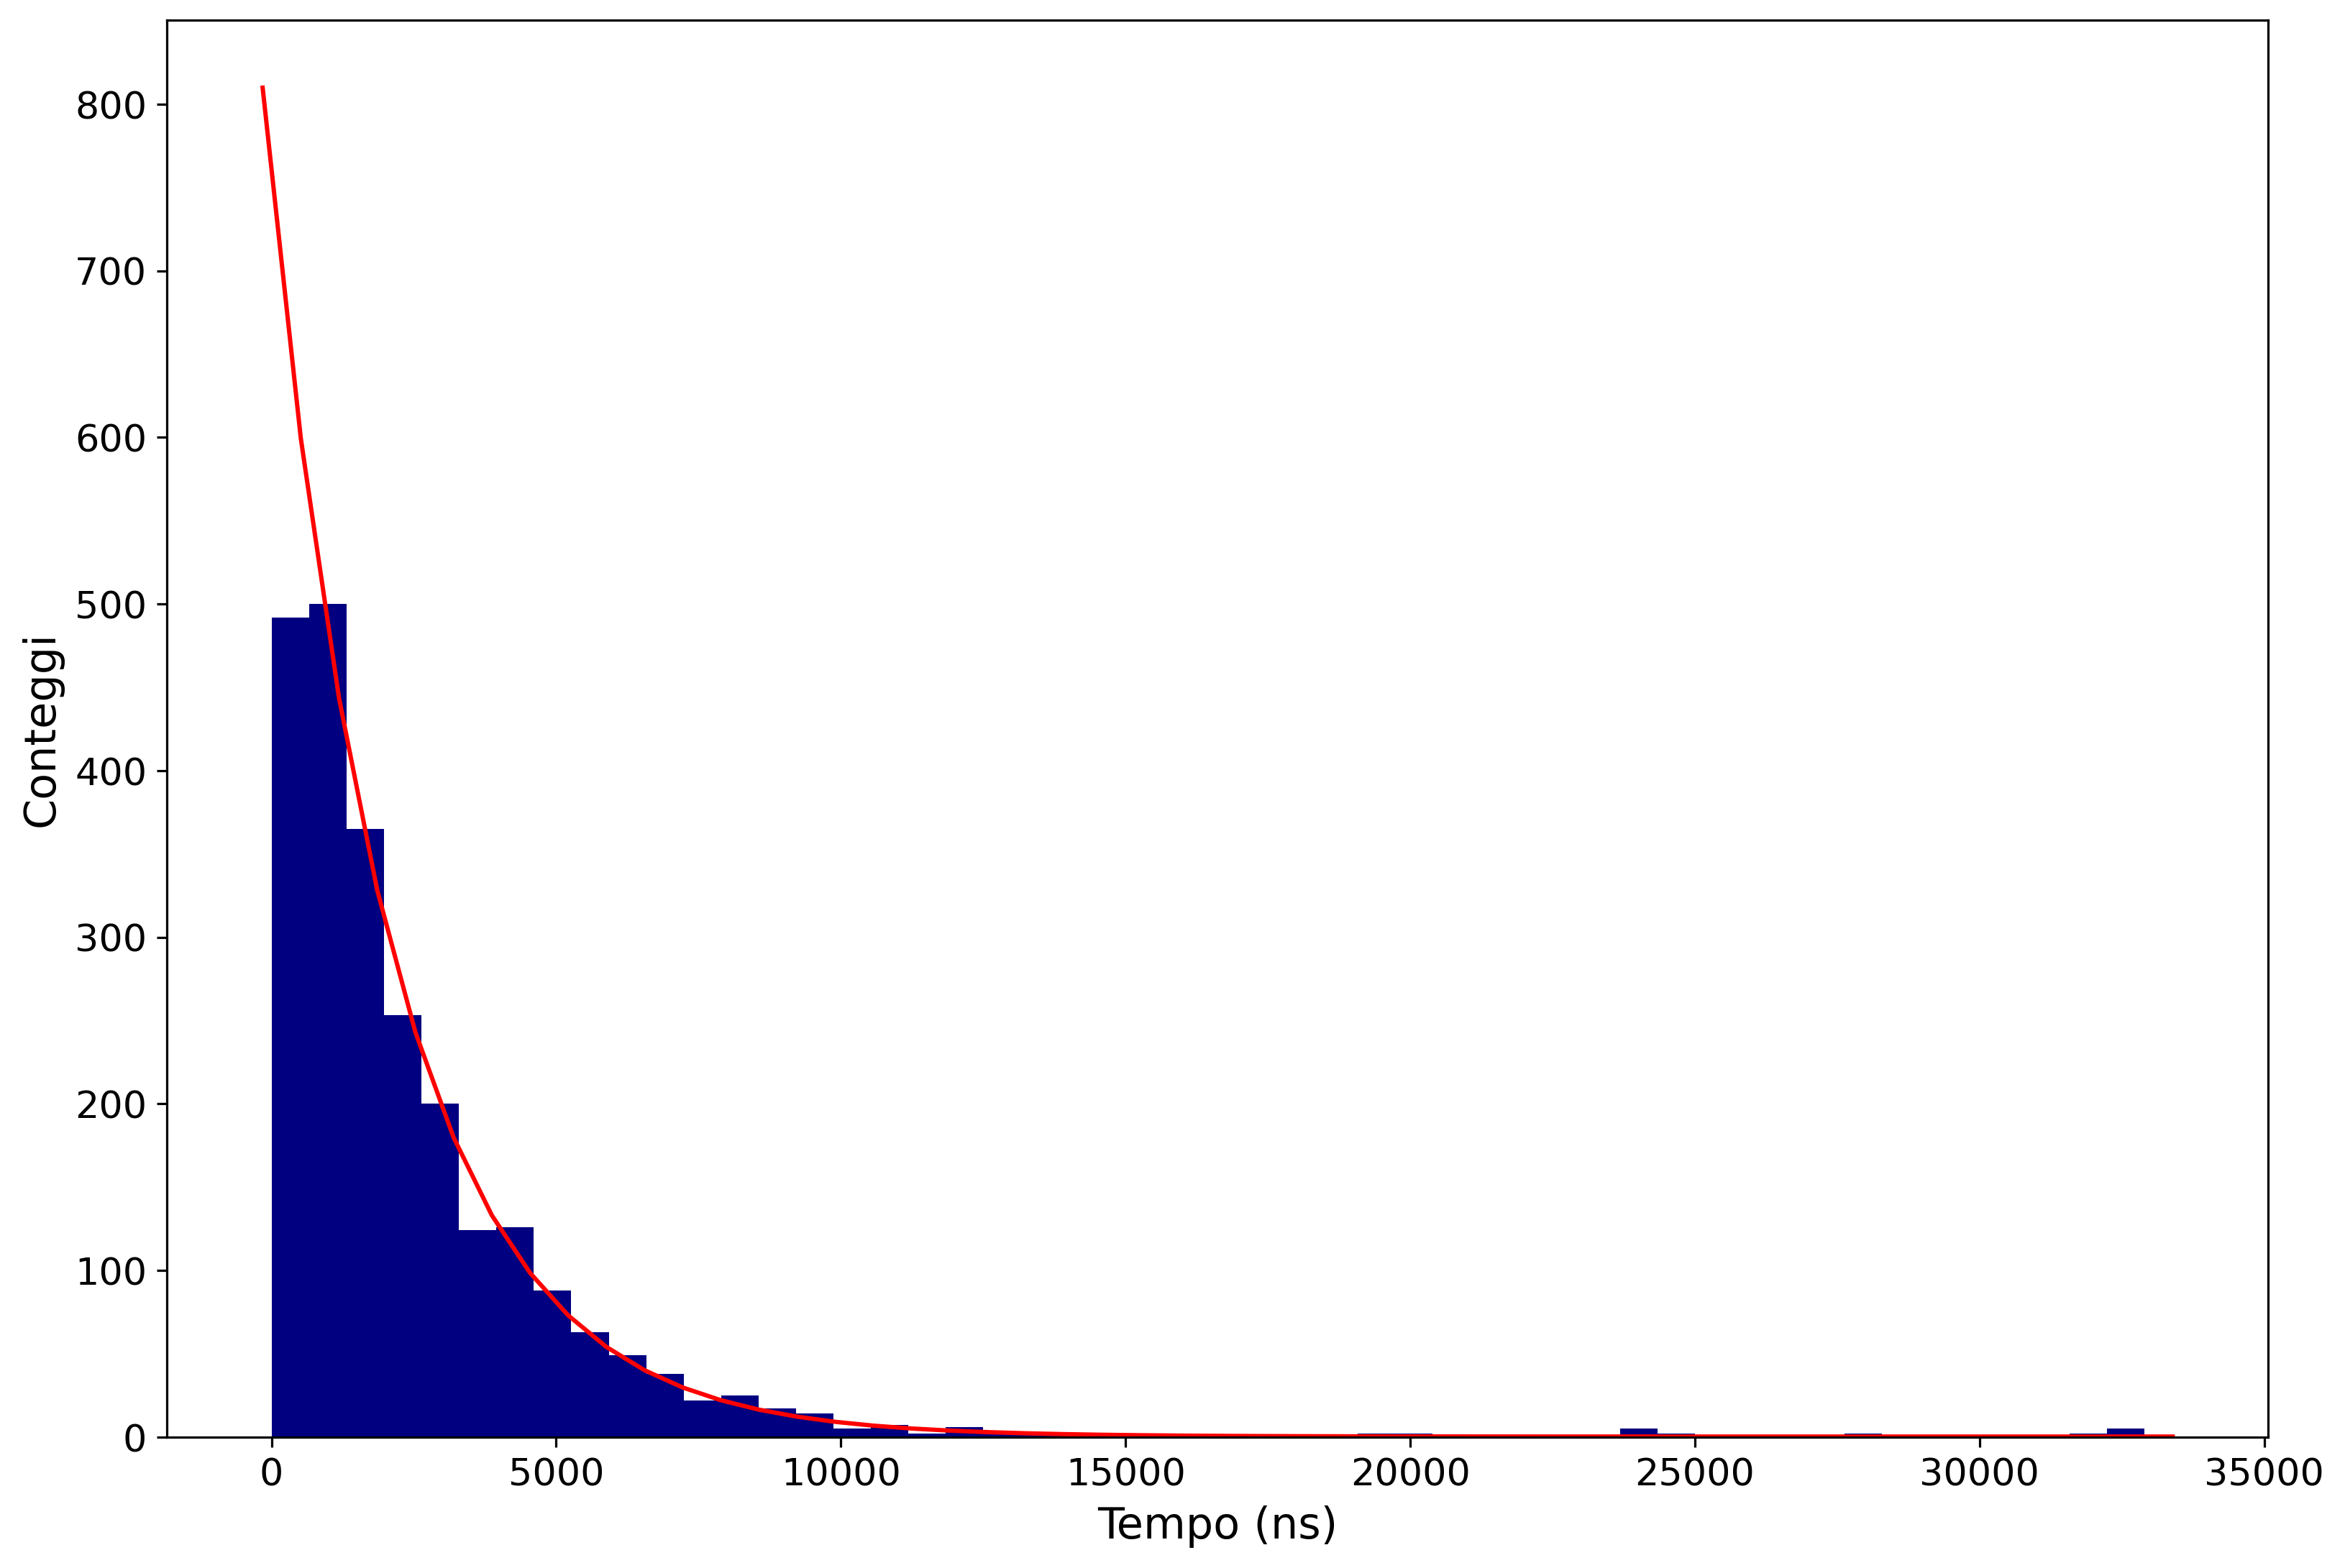

In [102]:
plt.figure(figsize=(13,9), dpi = 290)

ydcsi, xdcsi , othercsi = plt.hist(delta_t_csi, bins = 50, color = "navy")
params, cov = curve_fit(exp, fromhist(xdcsi)[1:], ydcsi[1:], (70,2000,0), [np.sqrt(i)+1 for i in ydcsi[1:]])
model = [exp(i, *params) for i in xs]
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.plot(xs,model, color = "r")

In [ ]:
params

In [ ]:
def first_zero(y):
    l = len(y)
    re = -1
    i = 0
    while i<l:

        if y[i] == 0:
            
            re = i
            break
        i = i+1
    
    #if there is no zero, the function returns -1
    if re ==-1:
        print("There's no zero in the list!")
    return re
first_zero(ydcsi)